In [2]:
# Dependencies
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import csv
import scipy.stats as st
from scipy.stats import linregress

In [3]:
#Reading the CSV file 
data_df = pd.read_csv('data.csv')
data_df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [4]:
#Using data to see if more songs were produced in 2020 (during global pandemic) than other recent years (2014-2020)

years_vs_2020_df = data_df.loc[(data_df['year'] == 2020) | (data_df['year'] == 2019) | (data_df['year'] == 2018) | (data_df['year'] == 2017) | (data_df['year'] == 2016)|(data_df['year'] == 2015)|(data_df['year'] == 2015)]


In [5]:
#Grouping the data y year and then ID: Using id column to identify each song individually and filtering by years
grouped__data = years_vs_2020_df.groupby(['year'])['id'].count()
grouped__data


year
2015    2300
2016    2349
2017    2156
2018    2714
2019    2329
2020    4294
Name: id, dtype: int64

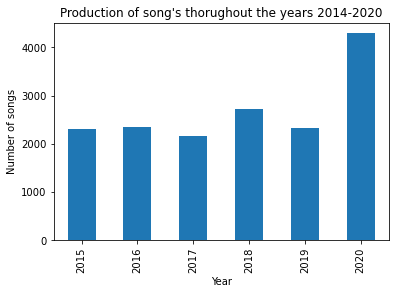

In [6]:
#Plotting the information 
grouped__data.plot(kind='bar',x='year',title="Production of song's thorughout the years 2014-2020",xlabel='Year', ylabel="Number of songs");


## Short Analysis
### Production of songs throughout the recent years compared to 2020

From the graph we can notice an increase in the production of songs in the year 2020 compared to other recent years. This indicates that during a global pandemic more songs were relased by artists and bands. With 2020 producing a total of 4294 songs and 2017 prodducing the least amount of songs 2156 overall, we can conclude that the major event of a global pandemic increased significantly the production of songs. 

In [7]:
#To create the same sample size across the years we decided to filter the data from each year by the popularity index. This index will allow us to see the top 500 songs per year. 
#Filtering 2020 top 500 songs 
year2020_df = data_df.loc[data_df['year'] == 2020].sort_values(['popularity'],ascending=False)
year2020_df_top = year2020_df.head(500)
year2020_df_top.median()


acousticness             0.1460
danceability             0.7120
duration_ms         191154.5000
energy                   0.6400
explicit                 1.0000
instrumentalness         0.0000
key                      6.0000
liveness                 0.1230
loudness                -6.0665
mode                     1.0000
popularity              80.0000
speechiness              0.0719
tempo                  122.9580
valence                  0.5010
year                  2020.0000
dtype: float64

In [8]:
year2020_df_top_f=year2020_df_top.median().transpose()
year_2020_df = pd.DataFrame(year2020_df_top_f).transpose().reset_index().sort_values('index').drop(columns='year')
year_2020_df.loc[0, 'index'] = 'Year 2020'
year_2020_df

,index,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
0,Year 2020,0.146,0.712,191154.5,0.64,1.0,0.0,6.0,0.123,-6.0665,1.0,80.0,0.0719,122.958,0.501


In [9]:
#Fltering 2019 top 500 songs 
year2019_df = data_df.loc[data_df['year'] == 2019].sort_values(['popularity'],ascending=False)
year2019_df_top = year2020_df.head(500)
year2019_df_top.median()

acousticness             0.1460
danceability             0.7120
duration_ms         191154.5000
energy                   0.6400
explicit                 1.0000
instrumentalness         0.0000
key                      6.0000
liveness                 0.1230
loudness                -6.0665
mode                     1.0000
popularity              80.0000
speechiness              0.0719
tempo                  122.9580
valence                  0.5010
year                  2020.0000
dtype: float64

In [10]:
#Fltering 2018 top 500 songs 
year2018_df = data_df.loc[data_df['year'] == 2018].sort_values(['popularity'],ascending=False)
year2018_df_top = year2018_df.head(500)
year2018_df_top.median()

acousticness             0.19150
danceability             0.68900
duration_ms         202202.00000
energy                   0.58000
explicit                 0.00000
instrumentalness         0.00000
key                      5.00000
liveness                 0.11700
loudness                -6.40750
mode                     1.00000
popularity              73.00000
speechiness              0.07065
tempo                  121.68550
valence                  0.39200
year                  2018.00000
dtype: float64

In [11]:
#Fltering 2017 top 500 songs 
year2017_df = data_df.loc[data_df['year'] == 2017].sort_values(['popularity'],ascending=False)
year2017_df_top = year2017_df.head(500)
year2017_df_top.median()

acousticness             0.1865
danceability             0.6620
duration_ms         208566.5000
energy                   0.6060
explicit                 0.0000
instrumentalness         0.0000
key                      6.0000
liveness                 0.1220
loudness                -6.6910
mode                     1.0000
popularity              72.0000
speechiness              0.0597
tempo                  117.9685
valence                  0.4155
year                  2017.0000
dtype: float64

In [12]:
#Fltering 2016 top 500 songs 
year2016_df = data_df.loc[data_df['year'] == 2019].sort_values(['popularity'],ascending=False)
year2016_df_top = year2016_df.head(500)
year2016_df_top.median()

acousticness             0.1715
danceability             0.6820
duration_ms         196066.0000
energy                   0.6235
explicit                 0.0000
instrumentalness         0.0000
key                      6.0000
liveness                 0.1200
loudness                -6.0340
mode                     1.0000
popularity              75.0000
speechiness              0.0677
tempo                  118.0185
valence                  0.4845
year                  2019.0000
dtype: float64

In [13]:
#Fltering 2015 top 500 songs 
year2015_df = data_df.loc[data_df['year'] == 2015].sort_values(['popularity'],ascending=False)
year2015_df_top = year2015_df.head(500)
year2015_df_top.median()

acousticness             0.1380
danceability             0.6080
duration_ms         219862.5000
energy                   0.6360
explicit                 0.0000
instrumentalness         0.0000
key                      5.0000
liveness                 0.1200
loudness                -6.3620
mode                     1.0000
popularity              68.0000
speechiness              0.0574
tempo                  118.7385
valence                  0.3985
year                  2015.0000
dtype: float64

In [14]:
#Creating the combined df for years 2015-2020
combined_df = pd.DataFrame({
    'Year 2020':year2020_df_top.median().transpose(),
    'Year 2019':year2019_df_top.median().transpose(),
    'Year 2018':year2018_df_top.median().transpose(),
    'Year 2017':year2017_df_top.median().transpose(),
    'Year 2016':year2016_df_top.median().transpose(),
    'Year 2015':year2015_df_top.median().transpose()
})

#Transpose the data frame, reset the index values and sort out by values
transposed_combined_df = combined_df.transpose().reset_index().sort_values('index')
transposed_combined_df

,index,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
5,Year 2015,0.1380,0.608,219862.5,0.6360,0.0,0.0,5.0,0.120,-6.3620,1.0,68.0,0.05740,118.7385,0.3985,2015.0
4,Year 2016,0.1715,0.682,196066.0,0.6235,0.0,0.0,6.0,0.120,-6.0340,1.0,75.0,0.06770,118.0185,0.4845,2019.0
3,Year 2017,0.1865,0.662,208566.5,0.6060,0.0,0.0,6.0,0.122,-6.6910,1.0,72.0,0.05970,117.9685,0.4155,2017.0
2,Year 2018,0.1915,0.689,202202.0,0.5800,0.0,0.0,5.0,0.117,-6.4075,1.0,73.0,0.07065,121.6855,0.3920,2018.0
1,Year 2019,0.1460,0.712,191154.5,0.6400,1.0,0.0,6.0,0.123,-6.0665,1.0,80.0,0.07190,122.9580,0.5010,2020.0
0,Year 2020,0.1460,0.712,191154.5,0.6400,1.0,0.0,6.0,0.123,-6.0665,1.0,80.0,0.07190,122.9580,0.5010,2020.0


In [15]:
#Droping the year column of the df
transposed_combined_df = transposed_combined_df.drop(columns='year')
#Creating column list from df
column_list = transposed_combined_df.columns[1:]
column_list

Index(['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity',
       'speechiness', 'tempo', 'valence'],
      dtype='object')

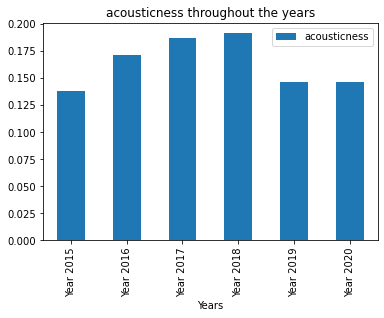

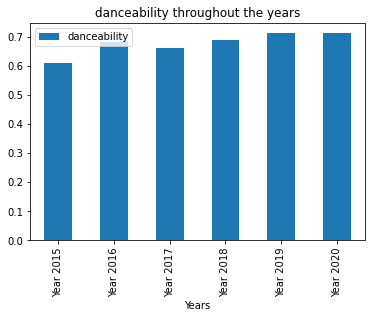

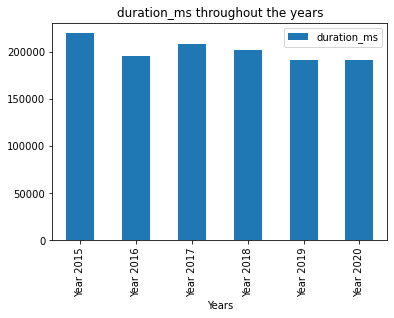

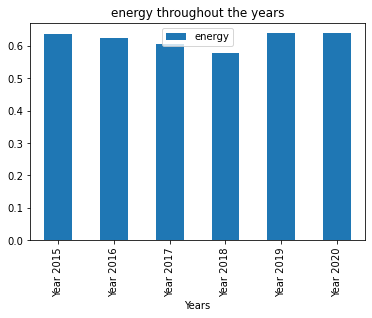

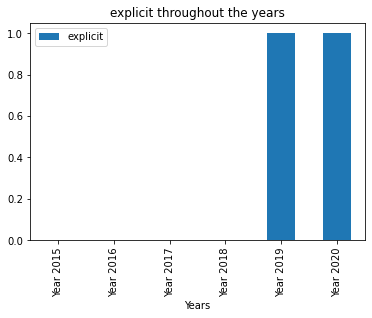

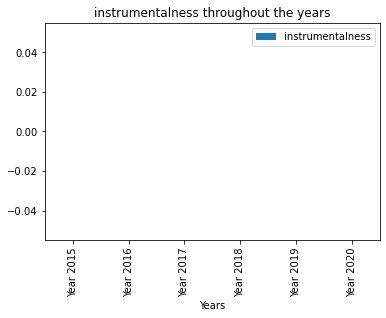

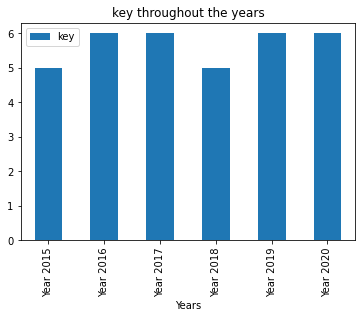

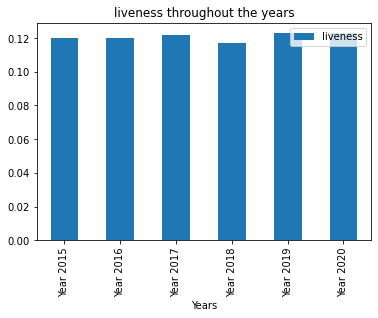

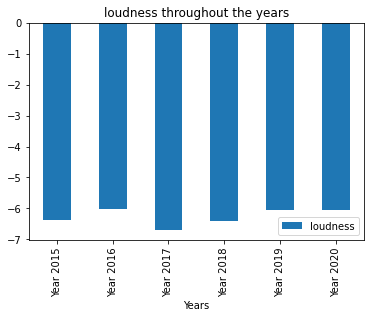

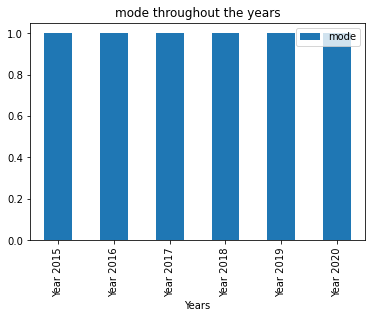

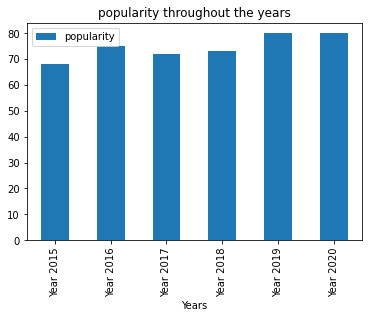

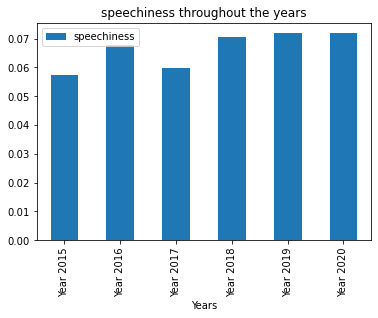

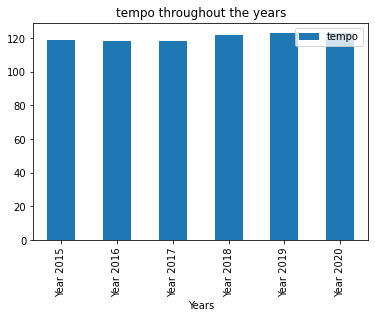

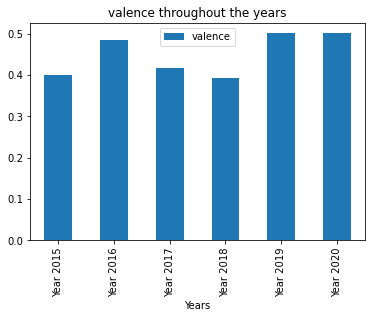

In [16]:
#Plotting: We decided to have  agrpah to represent each of the song components individually to be able to analyze. 
#Created a for loop 
for i in column_list:
    transposed_combined_df.plot(kind = 'bar', x = 'index', y = i)
    plt.title(f'{i} throughout the years')
    plt.xlabel('Years')
    plt.show();
    

## Analysis of the bargraphs


## Scatter plot per year and song key componenets to see if there are relationships and stablish data trends

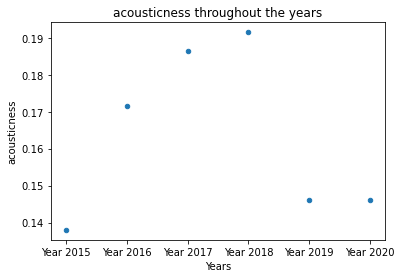

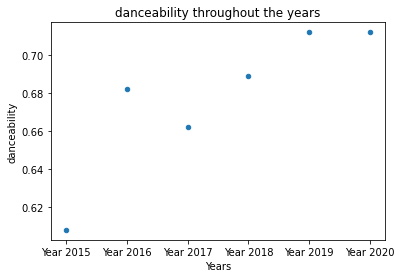

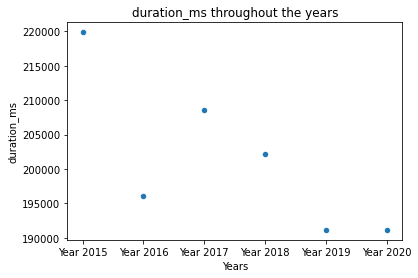

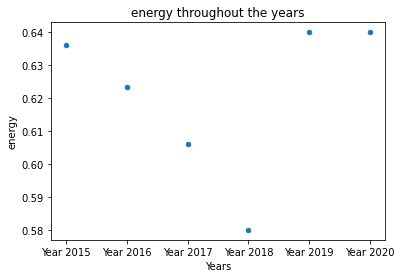

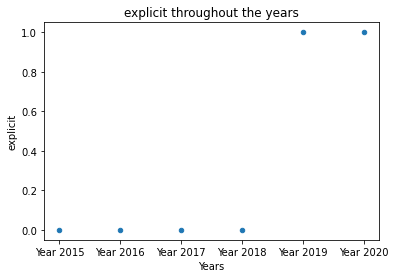

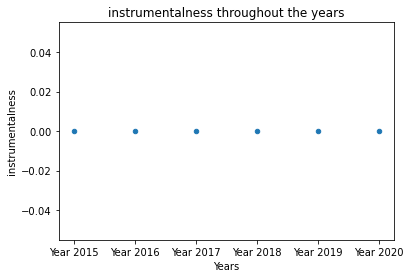

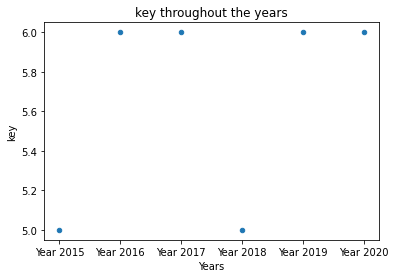

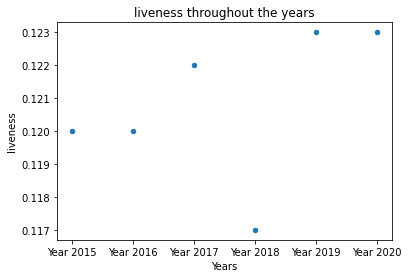

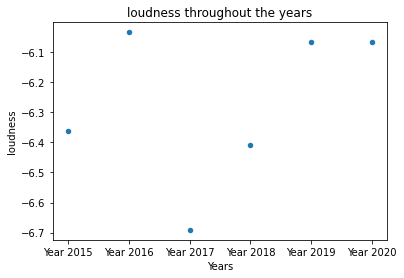

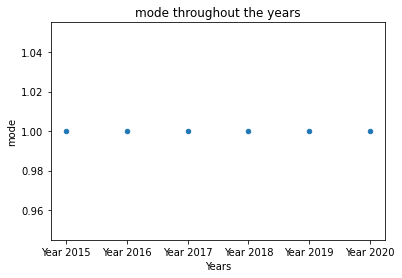

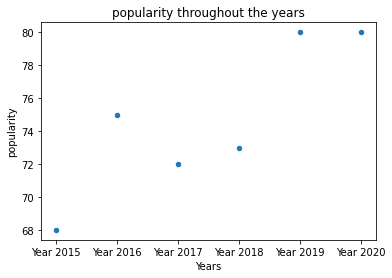

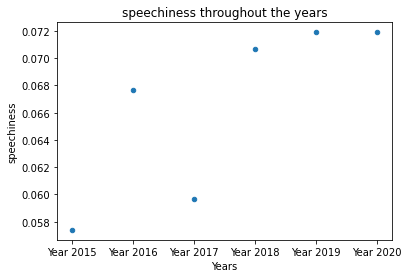

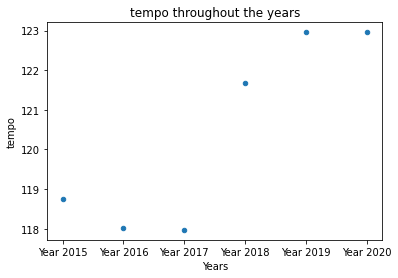

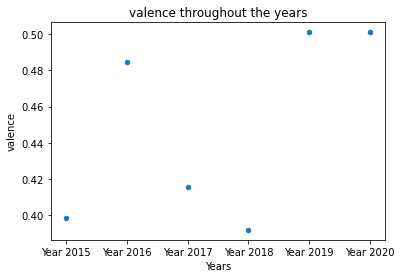

In [17]:
for i in column_list:
    transposed_combined_df.plot(kind = 'scatter', x = 'index', y = i)
    plt.title(f'{i} throughout the years')
    plt.xlabel('Years')
    plt.show();

### Analysis of scatter plots showcasing relationships


# 5 major historic events in the US.

## 1. The Great Depression 1929-1941

In [18]:
# Showing the original data frame
data_df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [19]:
#Extracting the information for the time period of 1929-1933
gd_df = data_df.loc[(data_df['year'] == 1929) | (data_df['year'] == 1930) | (data_df['year'] == 1931) | (data_df['year'] == 1932) | (data_df['year'] == 1933) | (data_df['year'] == 1934) | (data_df['year'] == 1935) | (data_df['year'] == 1936)| (data_df['year'] == 1937)| (data_df['year'] == 1938)| (data_df['year'] == 1939)| (data_df['year'] == 1940)| (data_df['year'] == 1941)]

In [20]:
#Grouping the data y year and then ID: Using id column to identify each song individually and filtering by years
gd_grouped_df = gd_df.groupby(['year'])['id'].count()
gd_grouped_df

year
1929     951
1930    1886
1931     968
1932     782
1933     702
1934     582
1935    1561
1936    2000
1937     661
1938     622
1939    1000
1940    1924
1941     967
Name: id, dtype: int64

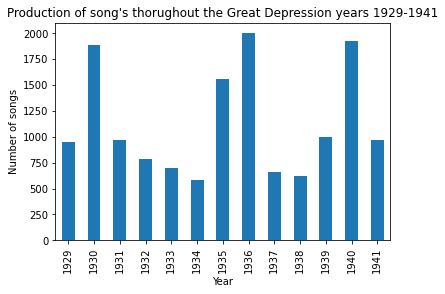

In [21]:
#Plotting the information 
gd_grouped_df.plot(kind='bar',x='year',title="Production of song's thorughout the Great Depression years 1929-1941",xlabel='Year', ylabel="Number of songs");


## Short Analysis
### Production of songs throughout 1929-1941

....

In [22]:
#To create the same sample size across the years we decided to filter the data from each year by the popularity index. This index will allow us to see the top 500 songs per year. 
#Filtering 1929 top 500 songs and getting the median for the key song components
year1929_df = data_df.loc[data_df['year'] == 1929].sort_values(['popularity'],ascending=False)
year1929_df_top = year1929_df.head(500)
year1929_df_top.median()

acousticness             0.952000
danceability             0.683000
duration_ms         161000.000000
energy                   0.236500
explicit                 0.000000
instrumentalness         0.000009
key                      6.000000
liveness                 0.178500
loudness               -17.571000
mode                     1.000000
popularity               0.000000
speechiness              0.198000
tempo                  115.346500
valence                  0.646000
year                  1929.000000
dtype: float64

In [23]:
#Filtering 1930 top 500 songs and getting the median for the key song components
year1930_df = data_df.loc[data_df['year'] == 1930].sort_values(['popularity'],ascending=False)
year1930_df_top = year1930_df.head(500)
year1930_df_top.median()

acousticness             0.98400
danceability             0.53400
duration_ms         184220.00000
energy                   0.28000
explicit                 0.00000
instrumentalness         0.06450
key                      5.00000
liveness                 0.14200
loudness               -12.87350
mode                     1.00000
popularity               1.00000
speechiness              0.05405
tempo                  108.31550
valence                  0.59750
year                  1930.00000
dtype: float64

In [24]:
#Filtering 1931 top 500 songs and getting the median for the key song components
year1931_df = data_df.loc[data_df['year'] == 1931].sort_values(['popularity'],ascending=False)
year1931_df_top = year1931_df.head(500)
year1931_df_top.median()

acousticness             0.935500
danceability             0.656500
duration_ms         158716.500000
energy                   0.220000
explicit                 0.000000
instrumentalness         0.000133
key                      5.000000
liveness                 0.180500
loudness               -16.836000
mode                     1.000000
popularity               0.000000
speechiness              0.128500
tempo                  110.556500
valence                  0.489000
year                  1931.000000
dtype: float64

In [25]:
#Filtering 1932 top 500 songs and getting the median for the key song components
year1932_df = data_df.loc[data_df['year'] == 1932].sort_values(['popularity'],ascending=False)
year1932_df_top = year1932_df.head(500)
year1932_df_top.median()

acousticness             0.941500
danceability             0.623000
duration_ms         170992.500000
energy                   0.233000
explicit                 0.000000
instrumentalness         0.000228
key                      5.000000
liveness                 0.167500
loudness               -16.012000
mode                     1.000000
popularity               0.000000
speechiness              0.083800
tempo                  107.855000
valence                  0.610500
year                  1932.000000
dtype: float64

In [26]:
#Filtering 1933 top 500 songs and getting the median for the key song components
year1933_df = data_df.loc[data_df['year'] == 1933].sort_values(['popularity'],ascending=False)
year1933_df_top = year1933_df.head(500)
year1933_df_top.median()

acousticness             0.953000
danceability             0.606500
duration_ms         178420.000000
energy                   0.240500
explicit                 0.000000
instrumentalness         0.000309
key                      5.000000
liveness                 0.156000
loudness               -12.401000
mode                     1.000000
popularity               9.000000
speechiness              0.048650
tempo                  108.563500
valence                  0.613500
year                  1933.000000
dtype: float64

In [27]:
#Filtering 1934 top 500 songs and getting the median for the key song components
year1934_df = data_df.loc[data_df['year'] == 1934].sort_values(['popularity'],ascending=False)
year1934_df_top = year1934_df.head(500)
year1934_df_top.median()

acousticness             0.9720
danceability             0.5375
duration_ms         184146.5000
energy                   0.2225
explicit                 0.0000
instrumentalness         0.0297
key                      5.0000
liveness                 0.1430
loudness               -14.8240
mode                     1.0000
popularity               0.0000
speechiness              0.0543
tempo                  116.9315
valence                  0.5690
year                  1934.0000
dtype: float64

In [28]:
#Filtering 1935 top 500 songs and getting the median for the key song components
year1935_df = data_df.loc[data_df['year'] == 1935].sort_values(['popularity'],ascending=False)
year1935_df_top = year1935_df.head(500)
year1935_df_top.median()

acousticness             0.94050
danceability             0.60100
duration_ms         182421.00000
energy                   0.22350
explicit                 0.00000
instrumentalness         0.01095
key                      6.00000
liveness                 0.16400
loudness               -13.60700
mode                     1.00000
popularity               1.00000
speechiness              0.05350
tempo                  110.94350
valence                  0.55350
year                  1935.00000
dtype: float64

In [29]:
#Filtering 1933 top 500 songs and getting the median for the key song components
year1936_df = data_df.loc[data_df['year'] == 1936].sort_values(['popularity'],ascending=False)
year1936_df_top = year1936_df.head(500)
year1936_df_top.median()

acousticness             0.851500
danceability             0.649000
duration_ms         186026.500000
energy                   0.339000
explicit                 0.000000
instrumentalness         0.000063
key                      5.000000
liveness                 0.172000
loudness               -13.229000
mode                     1.000000
popularity              10.000000
speechiness              0.071100
tempo                  107.487500
valence                  0.660000
year                  1936.000000
dtype: float64

In [30]:
#Filtering 1937 top 500 songs and getting the median for the key song components
year1937_df = data_df.loc[data_df['year'] == 1937].sort_values(['popularity'],ascending=False)
year1937_df_top = year1937_df.head(500)
year1937_df_top.median()

acousticness             0.95000
danceability             0.58450
duration_ms         180994.50000
energy                   0.26350
explicit                 0.00000
instrumentalness         0.05850
key                      6.00000
liveness                 0.16000
loudness               -12.56900
mode                     1.00000
popularity               0.00000
speechiness              0.05335
tempo                  112.51100
valence                  0.62500
year                  1937.00000
dtype: float64

In [31]:
#Filtering 1938 top 500 songs and getting the median for the key song components
year1938_df = data_df.loc[data_df['year'] == 1938].sort_values(['popularity'],ascending=False)
year1938_df_top = year1938_df.head(500)
year1938_df_top.median()

acousticness             0.97300
danceability             0.48700
duration_ms         193233.50000
energy                   0.23600
explicit                 0.00000
instrumentalness         0.31200
key                      5.00000
liveness                 0.16900
loudness               -14.60050
mode                     1.00000
popularity               0.00000
speechiness              0.04795
tempo                  110.65300
valence                  0.51600
year                  1938.00000
dtype: float64

In [32]:
#Filtering 1939 top 500 songs and getting the median for the key song components
year1939_df = data_df.loc[data_df['year'] == 1939].sort_values(['popularity'],ascending=False)
year1939_df_top = year1939_df.head(500)
year1939_df_top.median()

acousticness             0.95700
danceability             0.54450
duration_ms         179685.00000
energy                   0.24600
explicit                 0.00000
instrumentalness         0.02255
key                      5.50000
liveness                 0.16800
loudness               -13.68900
mode                     1.00000
popularity               3.00000
speechiness              0.05300
tempo                  113.73800
valence                  0.58000
year                  1939.00000
dtype: float64

In [33]:
#Filtering 1940 top 500 songs and getting the median for the key song components
year1940_df = data_df.loc[data_df['year'] == 1940].sort_values(['popularity'],ascending=False)
year1940_df_top = year1940_df.head(500)
year1940_df_top.median()

acousticness             0.95000
danceability             0.54700
duration_ms         182960.00000
energy                   0.28300
explicit                 0.00000
instrumentalness         0.03125
key                      5.00000
liveness                 0.18500
loudness               -13.22850
mode                     1.00000
popularity               1.00000
speechiness              0.05150
tempo                  103.09550
valence                  0.63800
year                  1940.00000
dtype: float64

In [34]:
#Filtering 1933 top 500 songs and getting the median for the key song components
year1941_df = data_df.loc[data_df['year'] == 1941].sort_values(['popularity'],ascending=False)
year1941_df_top = year1941_df.head(500)
year1941_df_top.median()

acousticness             0.9670
danceability             0.4850
duration_ms         183943.5000
energy                   0.2085
explicit                 0.0000
instrumentalness         0.1125
key                      5.0000
liveness                 0.1435
loudness               -14.5580
mode                     1.0000
popularity               0.0000
speechiness              0.0530
tempo                  105.7790
valence                  0.4360
year                  1941.0000
dtype: float64

In [35]:
#Creating data frame for years 1929-1933 Great Depression US
gd_transposed_combined_df = pd.DataFrame({'Year 1929': year1929_df_top.median().transpose(),
                                          'Year 1930': year1930_df_top.median().transpose(),
                                          'Year 1931': year1931_df_top.median().transpose(),
                                          'Year 1932': year1932_df_top.median().transpose(),
                                          'Year 1933': year1933_df_top.median().transpose(),
                                          'Year 1934': year1934_df_top.median().transpose(),
                                          'Year 1935': year1935_df_top.median().transpose(),
                                          'Year 1936': year1936_df_top.median().transpose(),
                                          'Year 1937': year1937_df_top.median().transpose(),
                                          'Year 1938': year1938_df_top.median().transpose(),
                                          'Year 1939': year1939_df_top.median().transpose(),
                                          'Year 1940': year1940_df_top.median().transpose(),
                                          'Year 1941': year1941_df_top.median().transpose()
                                         })
#Transposing the df and dropping column year
gd_transposed_combined_df = gd_transposed_combined_df.transpose().reset_index().sort_values('index').drop(columns='year')
gd_transposed_combined_df

,index,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
0,Year 1929,0.9520,0.6830,161000.0,0.2365,0.0,0.000009,6.0,0.1785,-17.5710,1.0,0.0,0.19800,115.3465,0.6460
1,Year 1930,0.9840,0.5340,184220.0,0.2800,0.0,0.064500,5.0,0.1420,-12.8735,1.0,1.0,0.05405,108.3155,0.5975
2,Year 1931,0.9355,0.6565,158716.5,0.2200,0.0,0.000133,5.0,0.1805,-16.8360,1.0,0.0,0.12850,110.5565,0.4890
3,Year 1932,0.9415,0.6230,170992.5,0.2330,0.0,0.000228,5.0,0.1675,-16.0120,1.0,0.0,0.08380,107.8550,0.6105
4,Year 1933,0.9530,0.6065,178420.0,0.2405,0.0,0.000309,5.0,0.1560,-12.4010,1.0,9.0,0.04865,108.5635,0.6135
5,Year 1934,0.9720,0.5375,184146.5,0.2225,0.0,0.029700,5.0,0.1430,-14.8240,1.0,0.0,0.05430,116.9315,0.5690
6,Year 1935,0.9405,0.6010,182421.0,0.2235,0.0,0.010950,6.0,0.1640,-13.6070,1.0,1.0,0.05350,110.9435,0.5535
7,Year 1936,0.8515,0.6490,186026.5,0.3390,0.0,0.000063,5.0,0.1720,-13.2290,1.0,10.0,0.07110,107.4875,0.6600
8,Year 1937,0.9500,0.5845,180994.5,0.2635,0.0,0.058500,6.0,0.1600,-12.5690,1.0,0.0,0.05335,112.5110,0.6250
9,Year 1938,0.9730,0.4870,193233.5,0.2360,0.0,0.312000,5.0,0.1690,-14.6005,1.0,0.0,0.04795,110.6530,0.5160


In [36]:
gd_column_list = gd_transposed_combined_df.columns[1:]
column_list

Index(['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity',
       'speechiness', 'tempo', 'valence'],
      dtype='object')

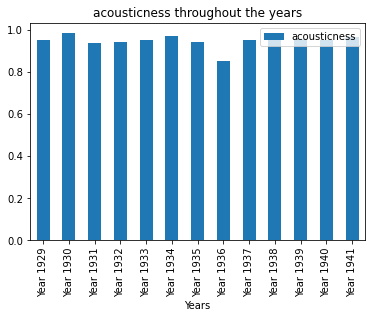

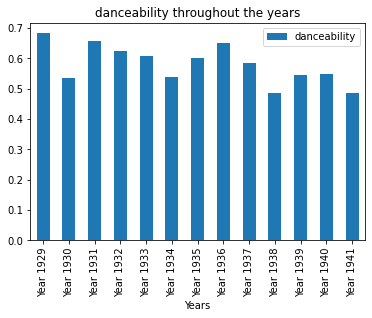

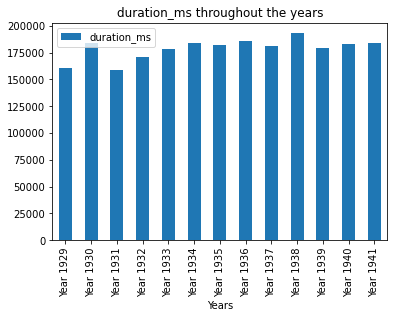

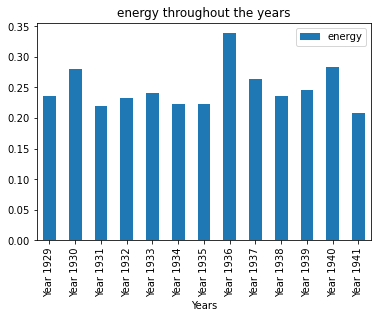

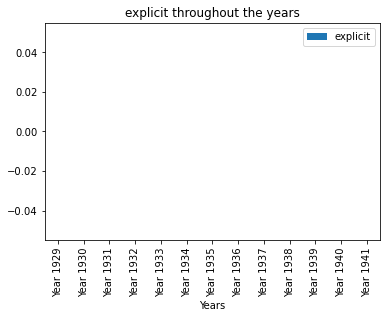

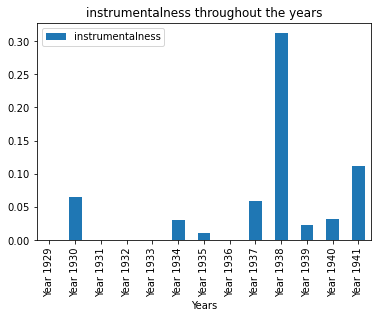

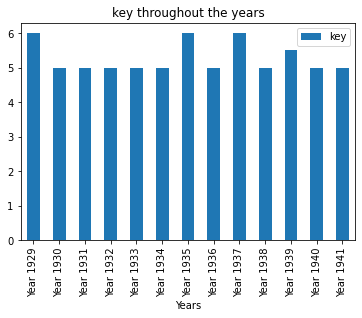

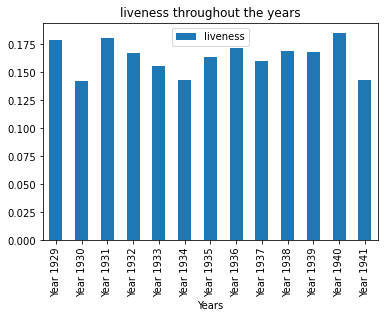

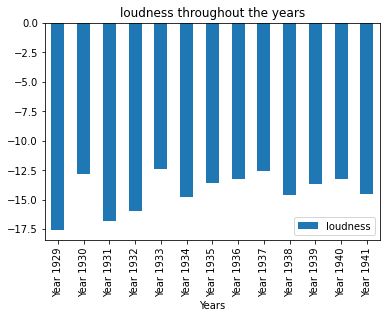

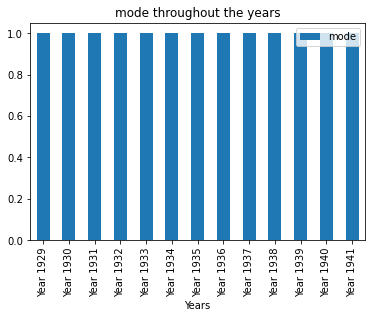

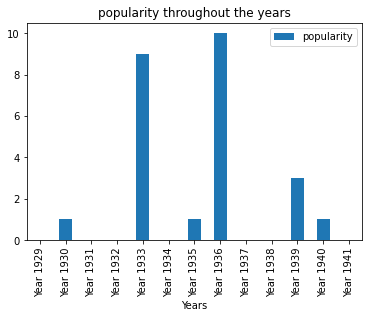

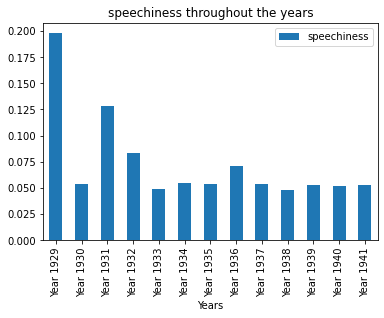

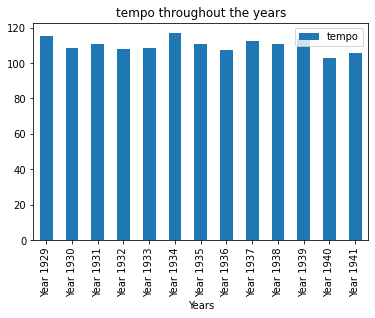

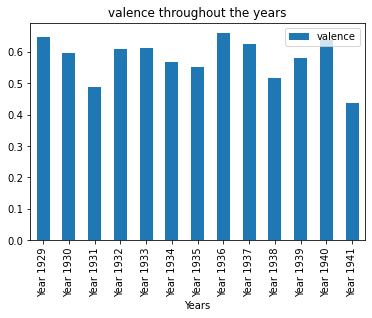

In [37]:
for i in gd_column_list:
    gd_transposed_combined_df.plot(kind = 'bar', x = 'index', y = i)
    plt.title(f'{i} throughout the years')
    plt.xlabel('Years')
    plt.show();

# Analysis of bargraphs Great Depression 1929-1941
## Analysis of scatterplots Great Depression 1929-1941

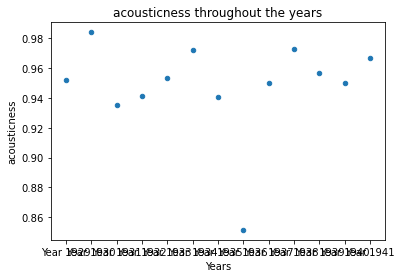

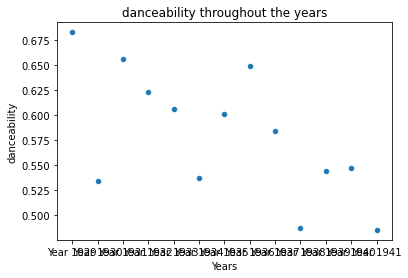

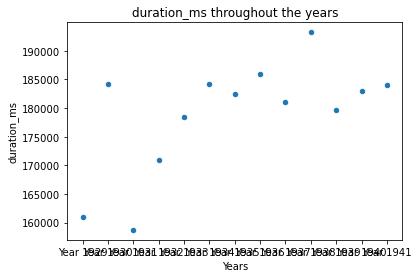

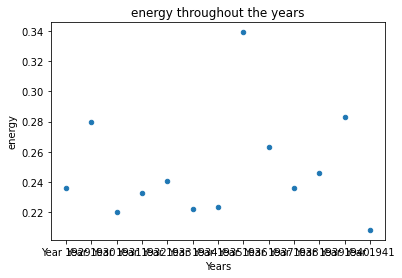

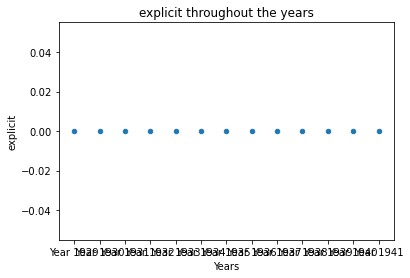

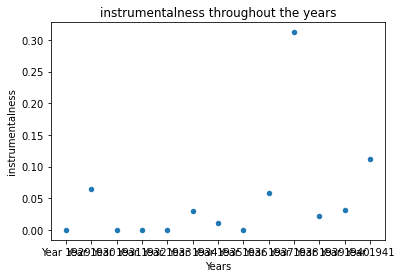

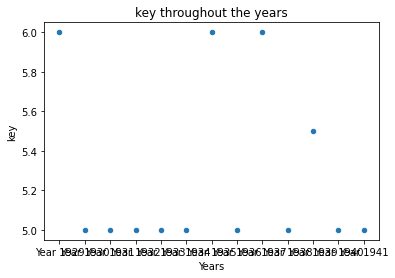

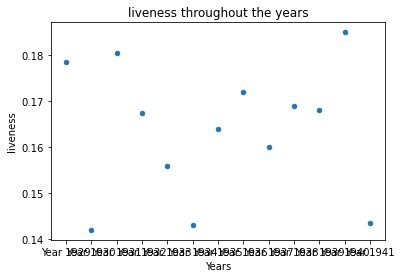

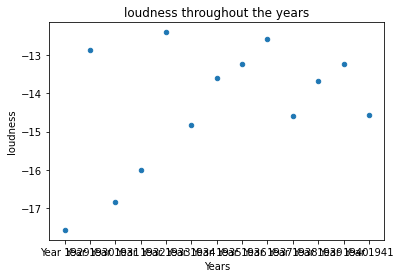

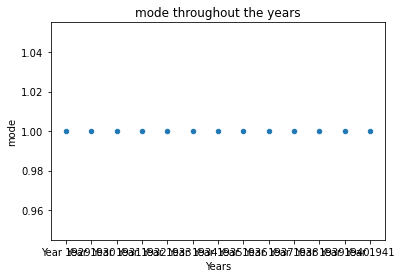

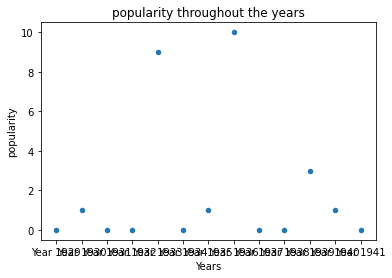

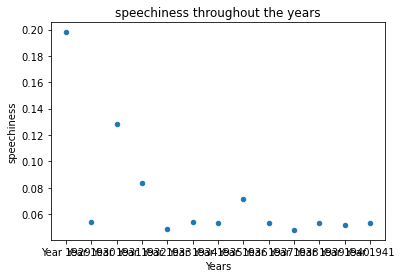

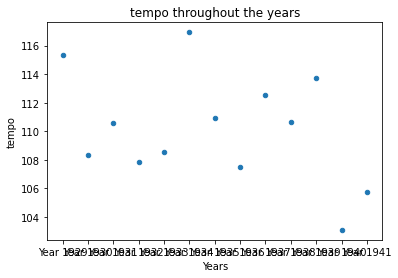

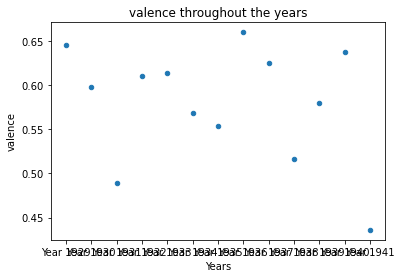

In [38]:
for i in gd_column_list:
    gd_transposed_combined_df.plot(kind = 'scatter', x = 'index', y = i)
    plt.title(f'{i} throughout the years')
    plt.xlabel('Years')
    plt.show();

## 2.  US involvment in the Second World War

In [39]:
# Showing the original data frame
data_df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [40]:
#Extracting the information for the time period of 1942-1945
ww2_df = data_df.loc[(data_df['year'] == 1942) | (data_df['year'] == 1943) | (data_df['year'] == 1944) | (data_df['year'] == 1945)]

In [41]:
#Grouping the data y year and then ID: Using id column to identify each song individually and filtering by years
ww2_grouped_df = gd_df.groupby(['year'])['id'].count()
ww2_grouped_df

year
1929     951
1930    1886
1931     968
1932     782
1933     702
1934     582
1935    1561
1936    2000
1937     661
1938     622
1939    1000
1940    1924
1941     967
Name: id, dtype: int64

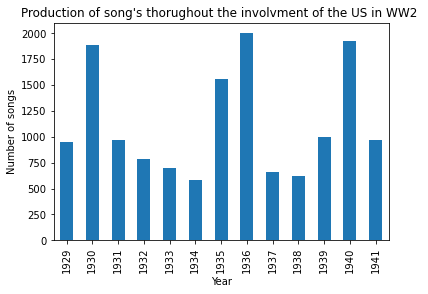

In [42]:
#Plotting the information 
ww2_grouped_df.plot(kind='bar',x='year',title="Production of song's thorughout the involvment of the US in WW2 ",xlabel='Year', ylabel="Number of songs");


## Short Analysis
### Production of songs throughout the recent years compared to 2020

....

In [43]:
#To create the same sample size across the years we decided to filter the data from each year by the popularity index. This index will allow us to see the top 500 songs per year. 
#Filtering 1942 top 500 songs and getting the median for the key song components
year1942_df = data_df.loc[data_df['year'] == 1942].sort_values(['popularity'],ascending=False)
year1942_df_top = year1929_df.head(500)
year1942_df_top.median()

acousticness             0.952000
danceability             0.683000
duration_ms         161000.000000
energy                   0.236500
explicit                 0.000000
instrumentalness         0.000009
key                      6.000000
liveness                 0.178500
loudness               -17.571000
mode                     1.000000
popularity               0.000000
speechiness              0.198000
tempo                  115.346500
valence                  0.646000
year                  1929.000000
dtype: float64

In [44]:
#Filtering 1943 top 500 songs and getting the median for the key song components
year1943_df = data_df.loc[data_df['year'] == 1943].sort_values(['popularity'],ascending=False)
year1943_df_top = year1943_df.head(500)
year1943_df_top.median()

acousticness             0.9675
danceability             0.4510
duration_ms         185733.5000
energy                   0.2400
explicit                 0.0000
instrumentalness         0.2085
key                      5.0000
liveness                 0.1585
loudness               -13.0595
mode                     1.0000
popularity               0.0000
speechiness              0.0511
tempo                  100.1695
valence                  0.4895
year                  1943.0000
dtype: float64

In [45]:
#Filtering 1944 top 500 songs and getting the median for the key song components
year1944_df = data_df.loc[data_df['year'] == 1944].sort_values(['popularity'],ascending=False)
year1944_df_top = year1944_df.head(500)
year1944_df_top.median()

acousticness             0.97600
danceability             0.51050
duration_ms         189367.00000
energy                   0.25350
explicit                 0.00000
instrumentalness         0.48800
key                      6.00000
liveness                 0.16200
loudness               -14.54450
mode                     1.00000
popularity               0.00000
speechiness              0.05735
tempo                  103.37550
valence                  0.52650
year                  1944.00000
dtype: float64

In [46]:
#Filtering 1945 top 500 songs and getting the median for the key song components
year1945_df = data_df.loc[data_df['year'] == 1945].sort_values(['popularity'],ascending=False)
year1945_df_top = year1945_df.head(500)
year1945_df_top.median()

acousticness             0.94650
danceability             0.48300
duration_ms         179931.00000
energy                   0.20950
explicit                 0.00000
instrumentalness         0.00132
key                      5.00000
liveness                 0.15250
loudness               -14.93700
mode                     1.00000
popularity               3.00000
speechiness              0.04440
tempo                  108.86150
valence                  0.51500
year                  1945.00000
dtype: float64

In [47]:
#Creating data frame for years 1942-1945 US involvment WW2
ww2_transposed_combined_df = pd.DataFrame({'Year 1942': year1942_df_top.median().transpose(),
                                          'Year 1943': year1943_df_top.median().transpose(),
                                          'Year 1944': year1944_df_top.median().transpose(),
                                          'Year 1945': year1945_df_top.median().transpose(),})
#Transposing the df and dropping column year
ww2_transposed_combined_df = ww2_transposed_combined_df.transpose().reset_index().sort_values('index').drop(columns='year')
ww2_transposed_combined_df

,index,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
0,Year 1942,0.9520,0.6830,161000.0,0.2365,0.0,0.000009,6.0,0.1785,-17.5710,1.0,0.0,0.19800,115.3465,0.6460
1,Year 1943,0.9675,0.4510,185733.5,0.2400,0.0,0.208500,5.0,0.1585,-13.0595,1.0,0.0,0.05110,100.1695,0.4895
2,Year 1944,0.9760,0.5105,189367.0,0.2535,0.0,0.488000,6.0,0.1620,-14.5445,1.0,0.0,0.05735,103.3755,0.5265
3,Year 1945,0.9465,0.4830,179931.0,0.2095,0.0,0.001320,5.0,0.1525,-14.9370,1.0,3.0,0.04440,108.8615,0.5150


In [48]:
ww2_column_list = ww2_transposed_combined_df.columns[1:]
ww2_column_list

Index(['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity',
       'speechiness', 'tempo', 'valence'],
      dtype='object')

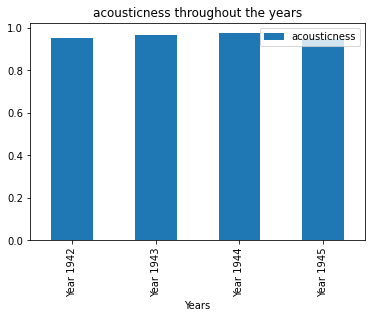

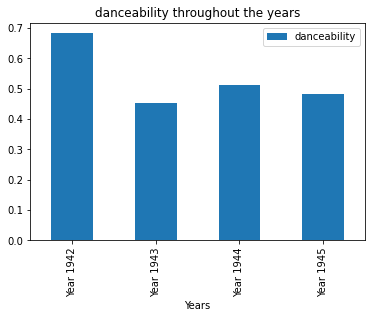

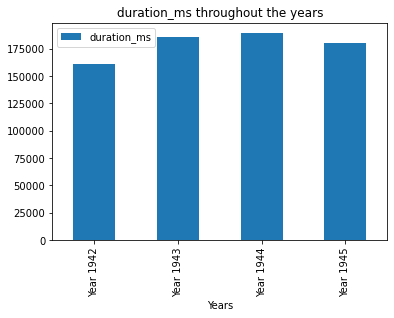

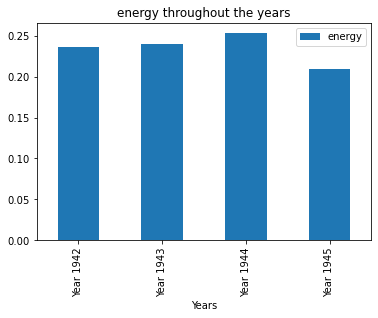

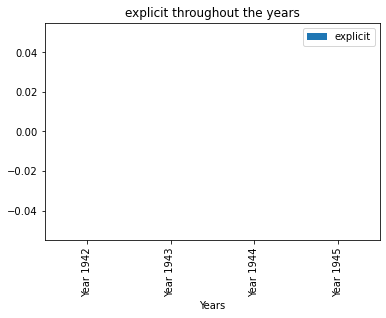

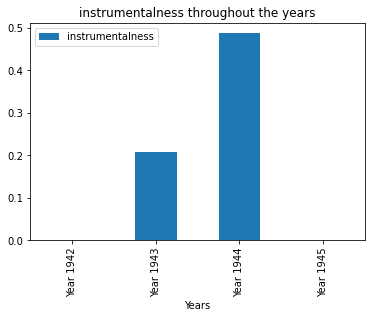

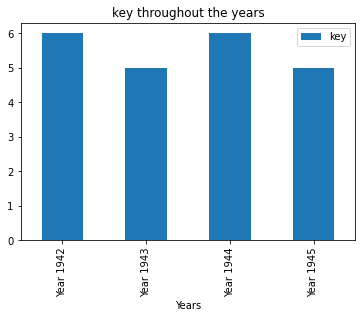

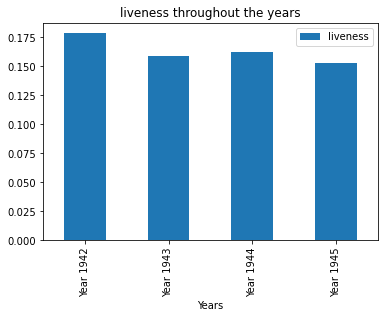

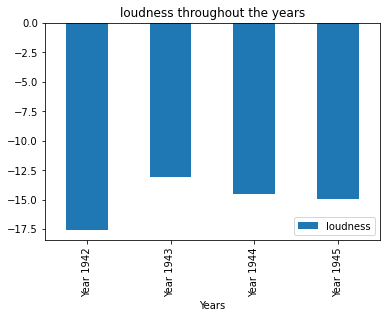

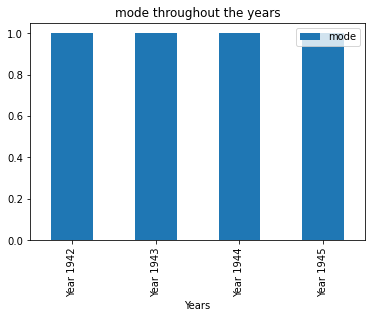

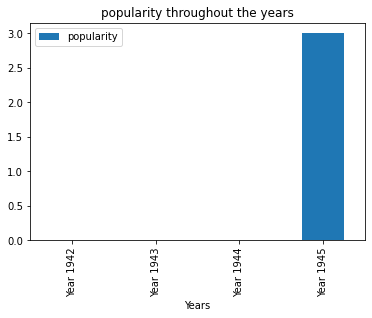

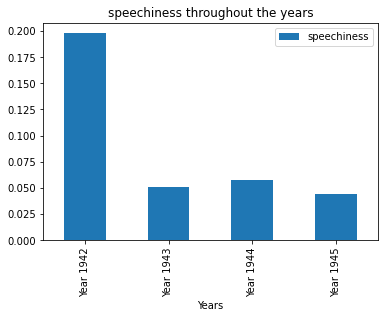

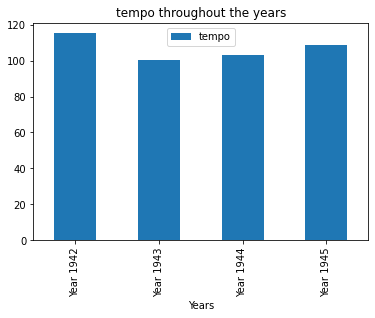

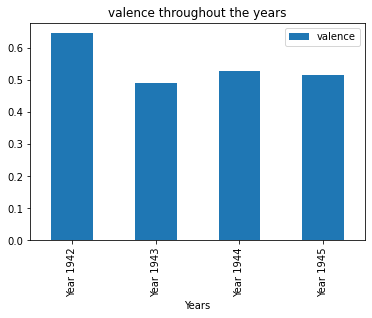

In [49]:
for i in ww2_column_list:
    ww2_transposed_combined_df.plot(kind = 'bar', x = 'index', y = i)
    plt.title(f'{i} throughout the years')
    plt.xlabel('Years')
    plt.show();

# Analysis of bargraphs US involvment in World War II
## Analysis of scatterplots US involvment in World War II

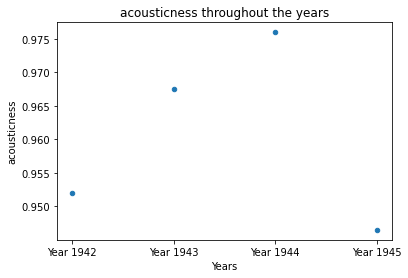

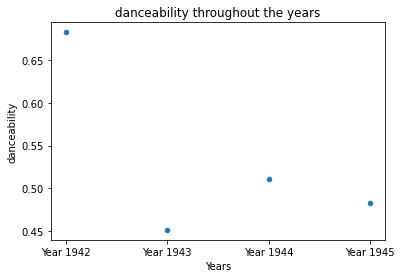

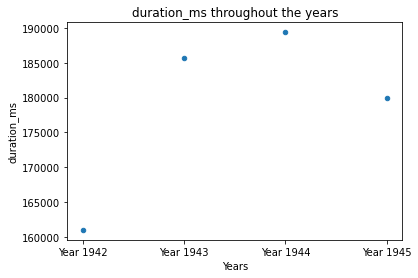

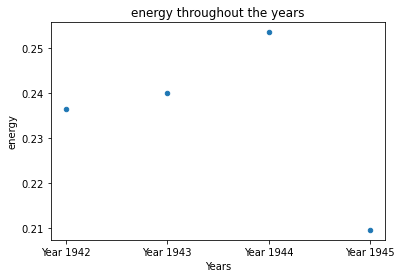

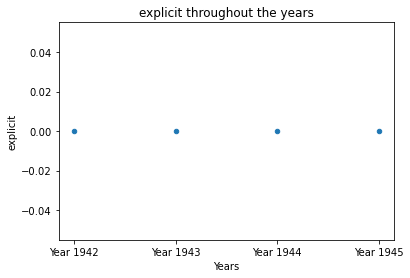

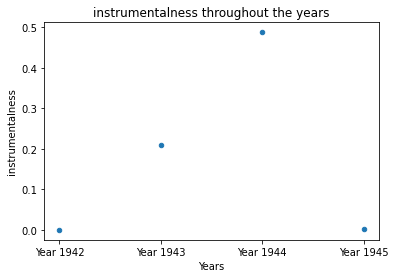

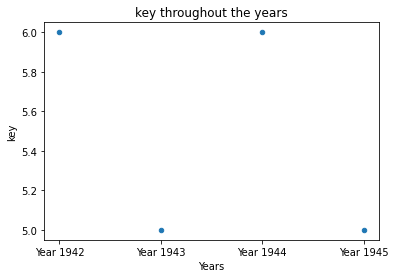

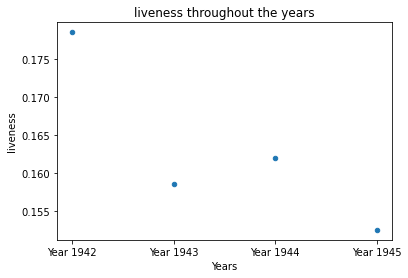

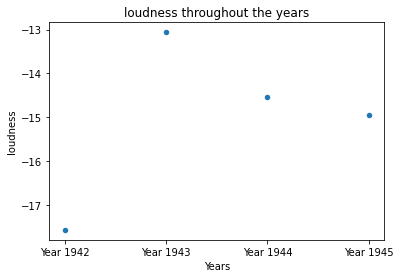

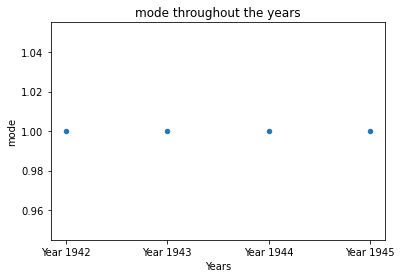

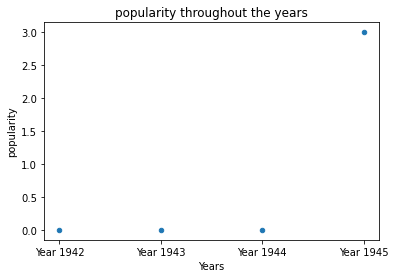

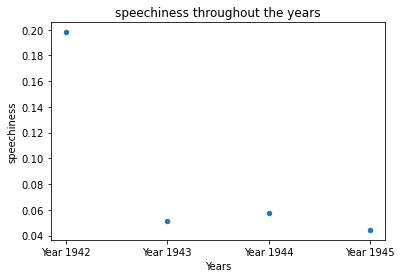

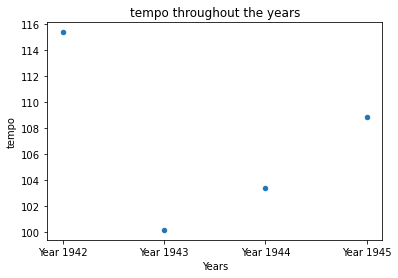

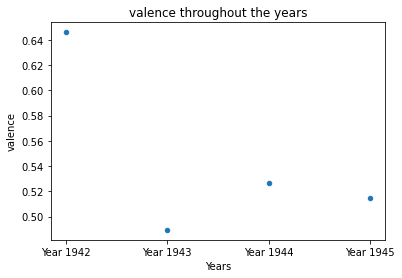

In [50]:
for i in ww2_column_list:
    ww2_transposed_combined_df.plot(kind = 'scatter', x = 'index', y = i)
    plt.title(f'{i} throughout the years')
    plt.xlabel('Years')
    plt.show();

### Analysis of scatter plots showcasing relationships

## 3. The economic crisis 1990-1992

In [51]:
# Showing the original data frame
data_df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [52]:
#Extracting the information for the time period of 1990-1992
ec_df = data_df.loc[(data_df['year'] == 1990) | (data_df['year'] == 1991) | (data_df['year'] == 1992)]

In [53]:
#Grouping the data y year and then ID: Using id column to identify each song individually and filtering by years
ec_grouped_df = ec_df.groupby(['year'])['id'].count()
ec_grouped_df

year
1990    2008
1991    2121
1992    2008
Name: id, dtype: int64

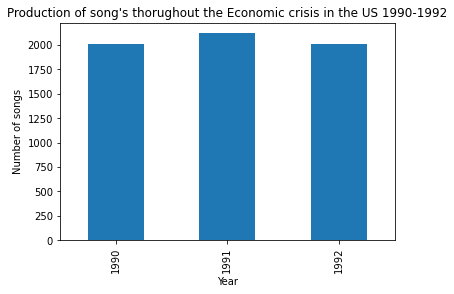

In [54]:
#Plotting the information 
ec_grouped_df.plot(kind='bar',x='year',title="Production of song's thorughout the Economic crisis in the US 1990-1992",xlabel='Year', ylabel="Number of songs");


## Short Analysis
### Production of songs throughout the recent years compared to 2020

....

In [55]:
#To create the same sample size across the years we decided to filter the data from each year by the popularity index. This index will allow us to see the top 500 songs per year. 
#Filtering 1990 top 500 songs and getting the median for the key song components
year1990_df = data_df.loc[data_df['year'] == 1990].sort_values(['popularity'],ascending=False)
year1990_df_top = year1990_df.head(500)
year1990_df_top.median()

acousticness             0.207500
danceability             0.568000
duration_ms         251493.500000
energy                   0.616000
explicit                 0.000000
instrumentalness         0.000084
key                      5.000000
liveness                 0.121000
loudness                -9.907000
mode                     1.000000
popularity              52.000000
speechiness              0.038500
tempo                  112.985000
valence                  0.532000
year                  1990.000000
dtype: float64

In [56]:
#Filtering 1991 top 500 songs and getting the median for the key song components
year1991_df = data_df.loc[data_df['year'] == 1991].sort_values(['popularity'],ascending=False)
year1991_df_top = year1991_df.head(500)
year1991_df_top.median()

acousticness             0.180500
danceability             0.558500
duration_ms         242466.500000
energy                   0.595000
explicit                 0.000000
instrumentalness         0.000074
key                      6.000000
liveness                 0.128000
loudness                -9.671500
mode                     1.000000
popularity              54.000000
speechiness              0.039000
tempo                  114.840500
valence                  0.527000
year                  1991.000000
dtype: float64

In [57]:
#Filtering 1992 top 500 songs and getting the median for the key song components
year1992_df = data_df.loc[data_df['year'] == 1992].sort_values(['popularity'],ascending=False)
year1992_df_top = year1992_df.head(500)
year1992_df_top.median()

acousticness             0.161000
danceability             0.580500
duration_ms         244753.500000
energy                   0.622500
explicit                 0.000000
instrumentalness         0.000067
key                      6.000000
liveness                 0.121000
loudness                -9.031500
mode                     1.000000
popularity              54.000000
speechiness              0.040500
tempo                  119.645000
valence                  0.596500
year                  1992.000000
dtype: float64

In [58]:
#Creating data frame for years 1990-1992 Economic crisis in the US
ec_transposed_combined_df = pd.DataFrame({'Year 1990': year1990_df_top.median().transpose(),
                                          'Year 1991': year1991_df_top.median().transpose(),
                                          'Year 1992': year1992_df_top.median().transpose()})
#Transposing the df and dropping column year
ec_transposed_combined_df = ec_transposed_combined_df.transpose().reset_index().sort_values('index').drop(columns='year')
ec_transposed_combined_df

,index,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
0,Year 1990,0.2075,0.5680,251493.5,0.6160,0.0,0.000084,5.0,0.121,-9.9070,1.0,52.0,0.0385,112.9850,0.5320
1,Year 1991,0.1805,0.5585,242466.5,0.5950,0.0,0.000074,6.0,0.128,-9.6715,1.0,54.0,0.0390,114.8405,0.5270
2,Year 1992,0.1610,0.5805,244753.5,0.6225,0.0,0.000067,6.0,0.121,-9.0315,1.0,54.0,0.0405,119.6450,0.5965


In [59]:
#Creting column list of ec df
ec_column_list = ec_transposed_combined_df.columns[1:]
ec_column_list

Index(['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity',
       'speechiness', 'tempo', 'valence'],
      dtype='object')

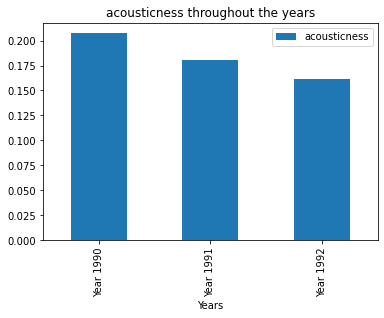

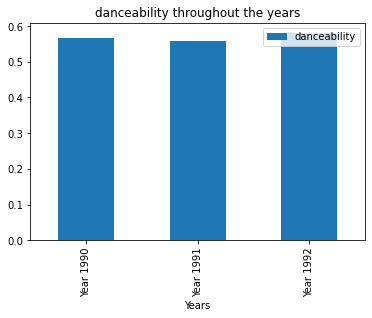

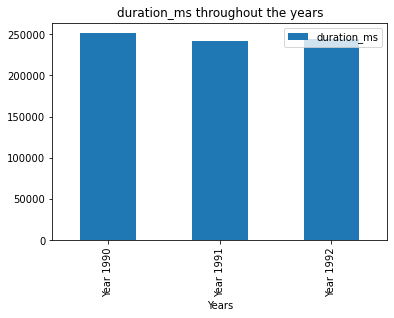

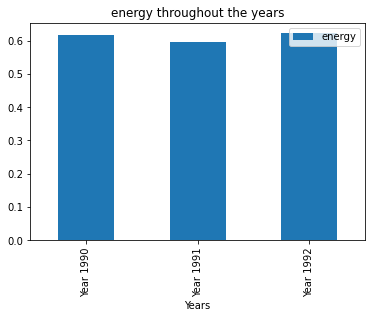

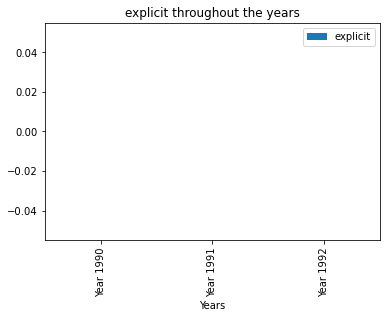

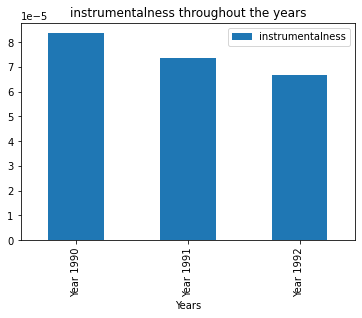

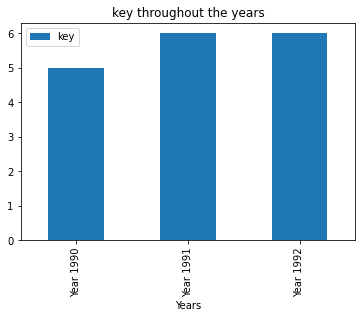

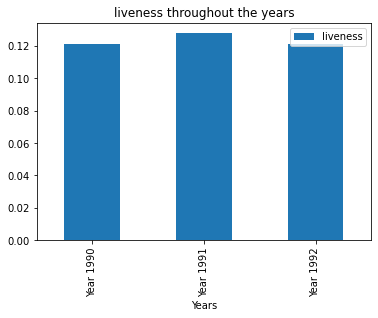

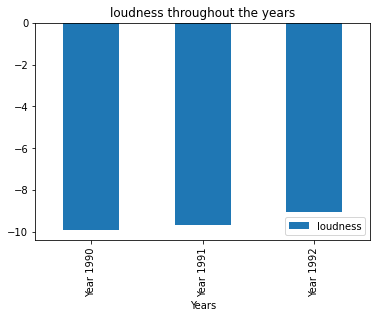

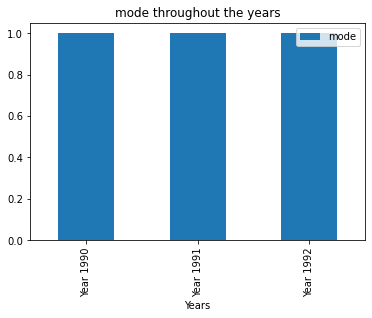

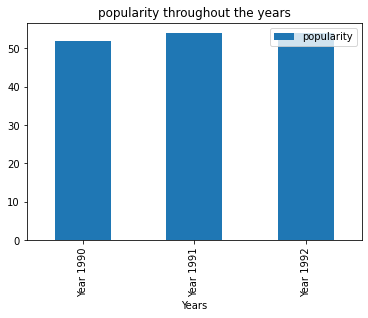

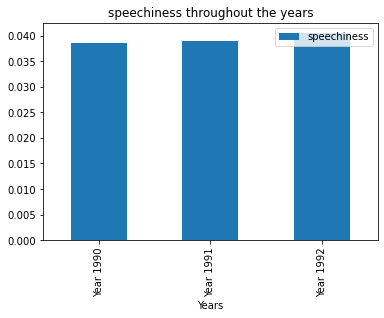

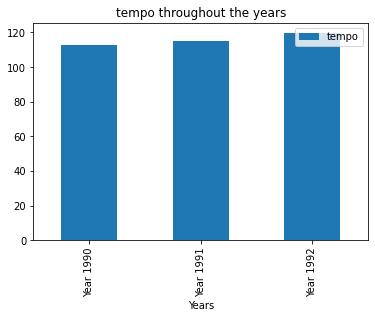

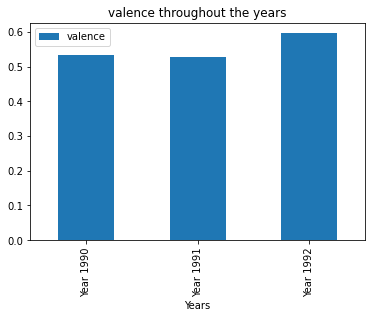

In [60]:
#Creating for loop to plot
for i in ec_column_list:
    ec_transposed_combined_df.plot(kind = 'bar', x = 'index', y = i)
    plt.title(f'{i} throughout the years')
    plt.xlabel('Years')
    plt.show();

# Analysis of bargraphs US economic crisis 1990-1992
## Analysis of scatterplots US economic crisis 1990-1992

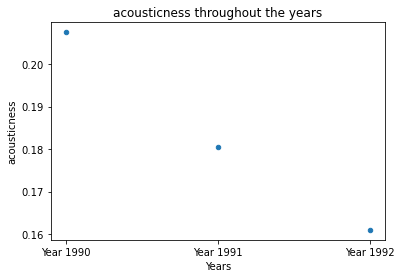

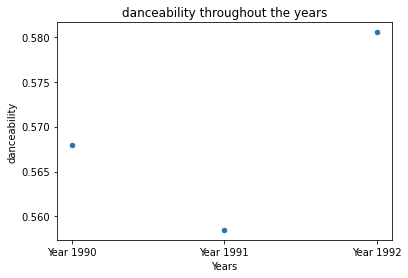

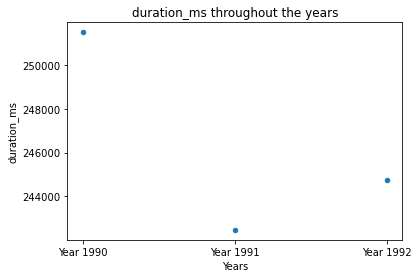

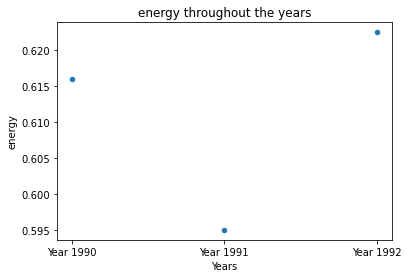

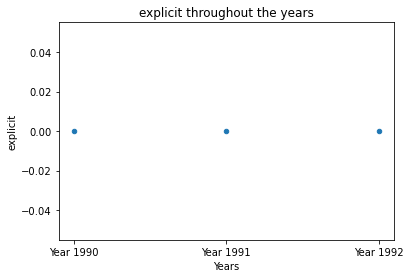

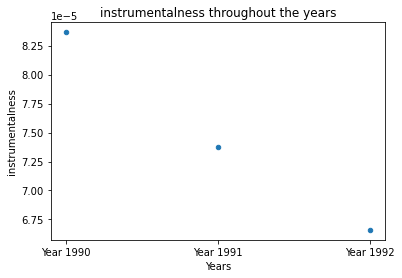

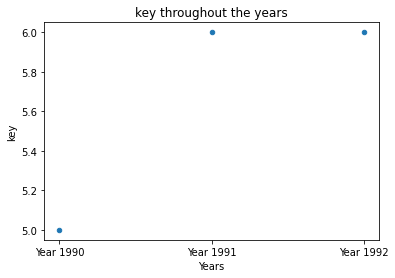

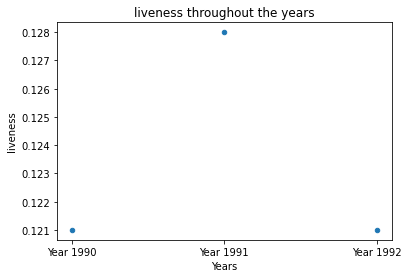

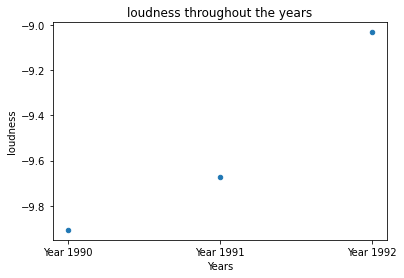

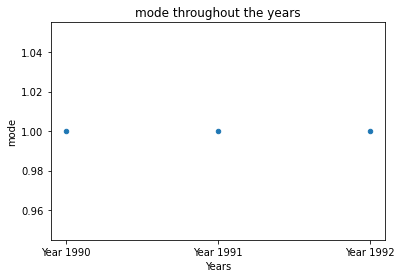

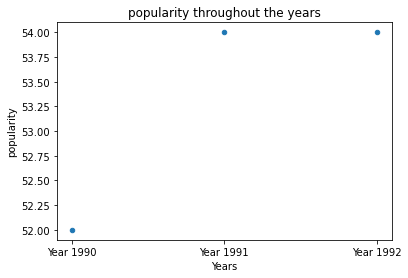

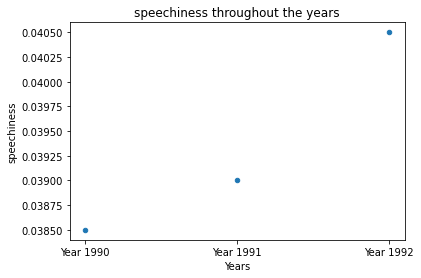

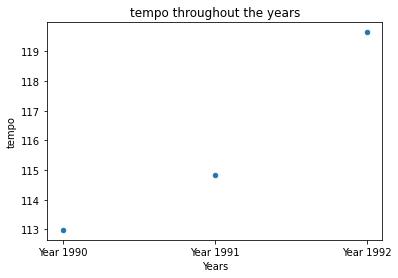

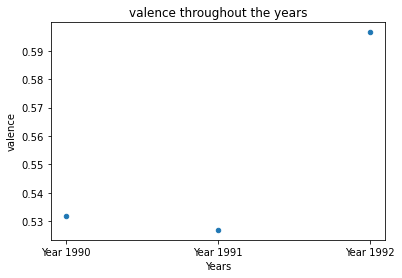

In [61]:
for i in ec_column_list:
    ec_transposed_combined_df.plot(kind = 'scatter', x = 'index', y = i)
    plt.title(f'{i} throughout the years')
    plt.xlabel('Years')
    plt.show();

## 4. Terrorist attacks on the US 2001-2002

In [62]:
# Showing the original data frame
data_df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [63]:
#Extracting the information for the time period of 2001-2002
ta_df = data_df.loc[(data_df['year'] == 2001) | (data_df['year'] == 2002)]

In [64]:
#Grouping the data y year and then ID: Using id column to identify each song individually and filtering by years
ta_grouped_df = ta_df.groupby(['year'])['id'].count()
ta_grouped_df

year
2001     981
2002    2055
Name: id, dtype: int64

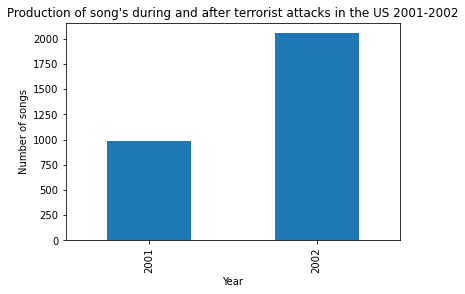

In [65]:
#Plotting the information 
ta_grouped_df.plot(kind='bar',x='year',title="Production of song's during and after terrorist attacks in the US 2001-2002",xlabel='Year', ylabel="Number of songs");


## Short Analysis
### Production of songs throughout the recent years compared to 2020

....

In [66]:
#To create the same sample size across the years we decided to filter the data from each year by the popularity index. This index will allow us to see the top 500 songs per year. 
#Filtering 2001 top 500 songs and getting the median for the key song components
year2001_df = data_df.loc[data_df['year'] == 2001].sort_values(['popularity'],ascending=False)
year2001_df_top = year2001_df.head(500)
year2001_df_top.median()

acousticness             0.09185
danceability             0.59800
duration_ms         232727.00000
energy                   0.69250
explicit                 0.00000
instrumentalness         0.00001
key                      6.00000
liveness                 0.13400
loudness                -6.27350
mode                     1.00000
popularity              58.00000
speechiness              0.04590
tempo                  110.48150
valence                  0.57150
year                  2001.00000
dtype: float64

In [67]:
#Filtering 2002 top 500 songs and getting the median for the key song components
year2002_df = data_df.loc[data_df['year'] == 2002].sort_values(['popularity'],ascending=False)
year2002_df_top = year2002_df.head(500)
year2002_df_top.median()

acousticness             0.141000
danceability             0.626500
duration_ms         233780.000000
energy                   0.679000
explicit                 0.000000
instrumentalness         0.000004
key                      5.000000
liveness                 0.116000
loudness                -5.981000
mode                     1.000000
popularity              58.000000
speechiness              0.044900
tempo                  114.978500
valence                  0.583500
year                  2002.000000
dtype: float64

In [68]:
#Creating data frame for years 1942-1945 US involvment WW2
ta_transposed_combined_df = pd.DataFrame({'Year 2001': year2001_df_top.median().transpose(),
                                          'Year 2002': year2002_df_top.median().transpose()})
#Transposing the df and dropping column year
ta_transposed_combined_df = ta_transposed_combined_df.transpose().reset_index().sort_values('index').drop(columns='year')
ta_transposed_combined_df

,index,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
0,Year 2001,0.09185,0.5980,232727.0,0.6925,0.0,0.000010,6.0,0.134,-6.2735,1.0,58.0,0.0459,110.4815,0.5715
1,Year 2002,0.14100,0.6265,233780.0,0.6790,0.0,0.000004,5.0,0.116,-5.9810,1.0,58.0,0.0449,114.9785,0.5835


In [69]:
ta_column_list = ta_transposed_combined_df.columns[1:]
column_list

Index(['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity',
       'speechiness', 'tempo', 'valence'],
      dtype='object')

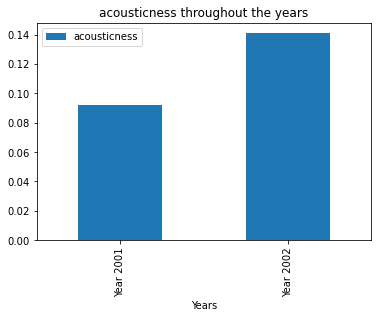

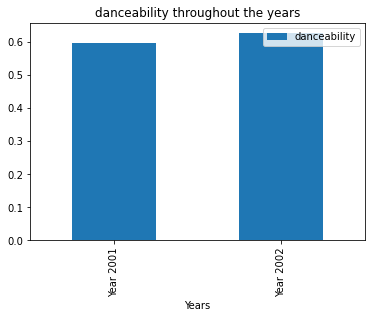

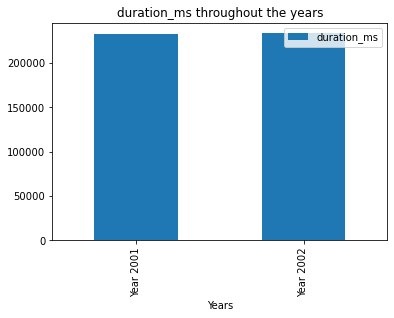

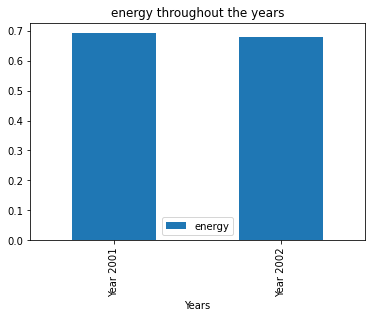

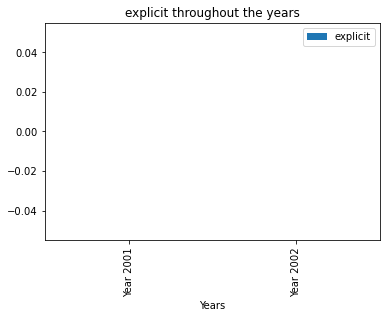

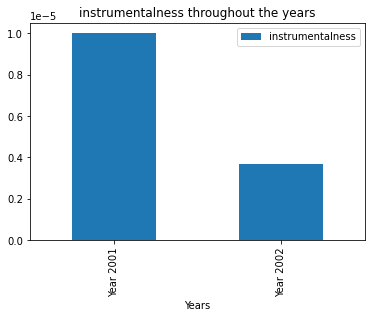

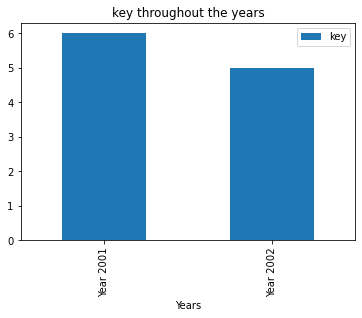

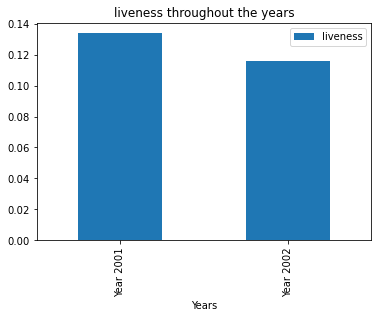

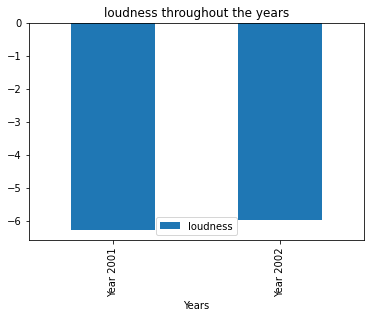

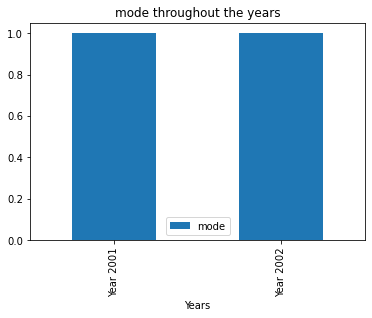

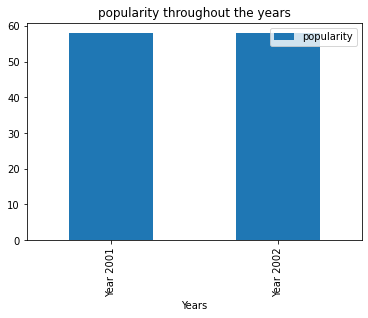

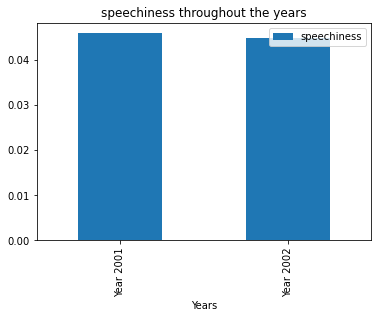

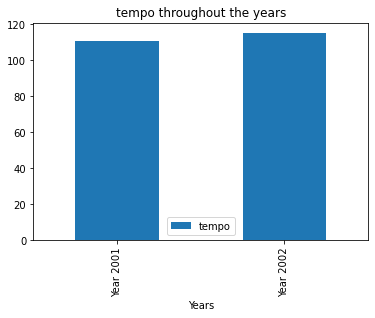

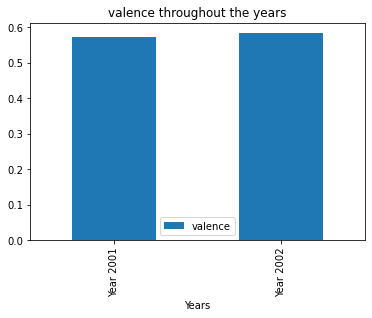

In [70]:
for i in ta_column_list:
    ta_transposed_combined_df.plot(kind = 'bar', x = 'index', y = i)
    plt.title(f'{i} throughout the years')
    plt.xlabel('Years')
    plt.show();

# Analysis of bargraphs terrorist attacks in the US 2001-2002
## Analysis of scatterplots terrorist attacks in the US 2001-2002

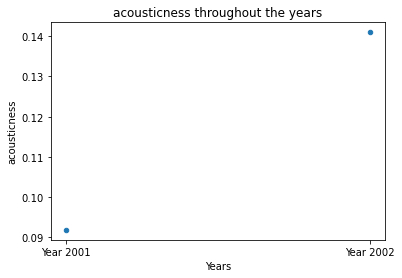

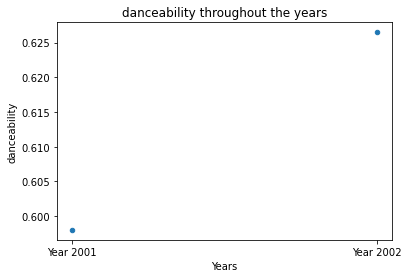

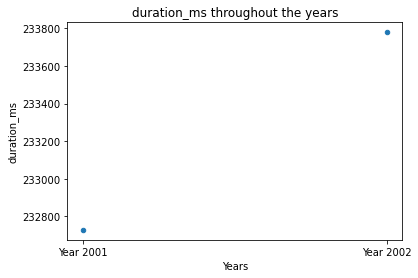

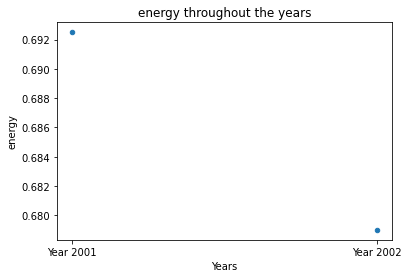

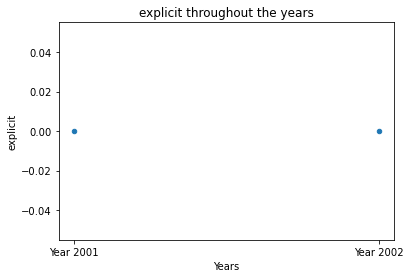

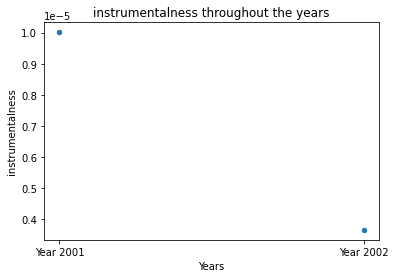

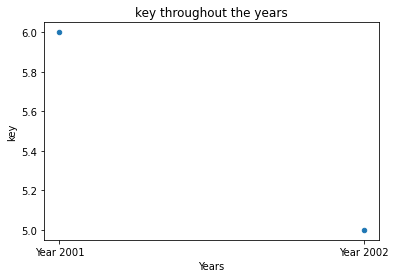

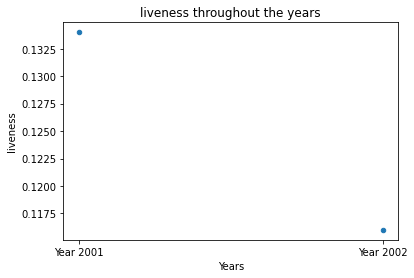

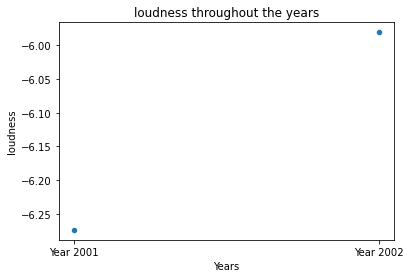

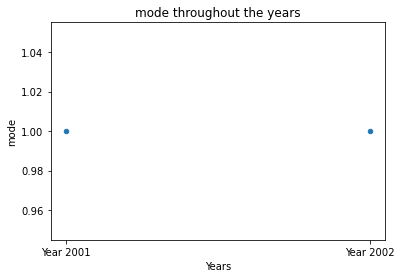

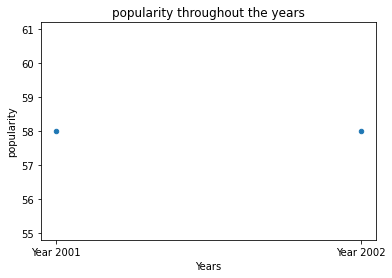

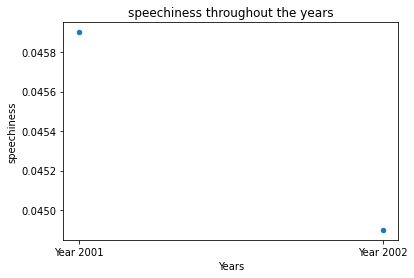

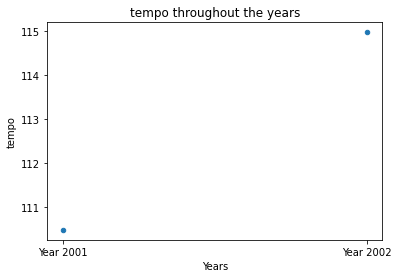

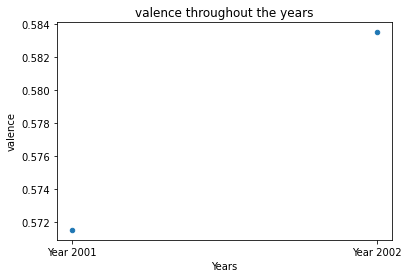

In [71]:
for i in ta_column_list:
    ta_transposed_combined_df.plot(kind = 'scatter', x = 'index', y = i)
    plt.title(f'{i} throughout the years')
    plt.xlabel('Years')
    plt.show();

## 5. 2007-2008 economic crisis in the US

In [72]:
# Showing the original data frame
data_df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [73]:
#Extracting the information for the time period of 1990-1992
ec2_df = data_df.loc[(data_df['year'] == 2007) | (data_df['year'] == 2008)]

In [74]:
#Grouping the data y year and then ID: Using id column to identify each song individually and filtering by years
ec2_grouped_df = ec_df.groupby(['year'])['id'].count()
ec2_grouped_df

year
1990    2008
1991    2121
1992    2008
Name: id, dtype: int64

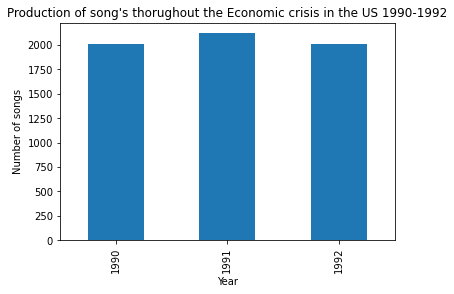

In [75]:
#Plotting the information 
ec2_grouped_df.plot(kind='bar',x='year',title="Production of song's thorughout the Economic crisis in the US 1990-1992",xlabel='Year', ylabel="Number of songs");


In [76]:
#To create the same sample size across the years we decided to filter the data from each year by the popularity index. This index will allow us to see the top 500 songs per year. 
#Filtering 2007 top 500 songs and getting the median for the key song components
year2007_df = data_df.loc[data_df['year'] == 2007].sort_values(['popularity'],ascending=False)
year2007_df_top = year2007_df.head(500)
year2007_df_top.median()

acousticness             0.098650
danceability             0.597000
duration_ms         230113.500000
energy                   0.725000
explicit                 0.000000
instrumentalness         0.000002
key                      5.000000
liveness                 0.127500
loudness                -5.661000
mode                     1.000000
popularity              60.000000
speechiness              0.047200
tempo                  122.378500
valence                  0.540500
year                  2007.000000
dtype: float64

In [77]:
#Filtering 2008 top 500 songs and getting the median for the key song components
year2008_df = data_df.loc[data_df['year'] == 2008].sort_values(['popularity'],ascending=False)
year2008_df_top = year2008_df.head(500)
year2008_df_top.median()

acousticness             0.096950
danceability             0.617000
duration_ms         231966.500000
energy                   0.697000
explicit                 0.000000
instrumentalness         0.000002
key                      5.000000
liveness                 0.129500
loudness                -5.584000
mode                     1.000000
popularity              60.000000
speechiness              0.042500
tempo                  122.828500
valence                  0.522500
year                  2008.000000
dtype: float64

In [78]:
#Creating data frame for years 1990-1992 Economic crisis in the US
ec2_transposed_combined_df = pd.DataFrame({'Year 2007': year2007_df_top.median().transpose(),
                                          'Year 2008': year2008_df_top.median().transpose()})
#Transposing the df and dropping column year
ec2_transposed_combined_df = ec2_transposed_combined_df.transpose().reset_index().sort_values('index').drop(columns='year')
ec2_transposed_combined_df

,index,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
0,Year 2007,0.09865,0.597,230113.5,0.725,0.0,0.000002,5.0,0.1275,-5.661,1.0,60.0,0.0472,122.3785,0.5405
1,Year 2008,0.09695,0.617,231966.5,0.697,0.0,0.000002,5.0,0.1295,-5.584,1.0,60.0,0.0425,122.8285,0.5225


In [79]:
#Creting column list of ec df
ec2_column_list = ec2_transposed_combined_df.columns[1:]
ec2_column_list

Index(['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity',
       'speechiness', 'tempo', 'valence'],
      dtype='object')

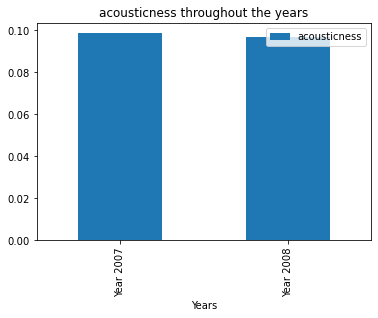

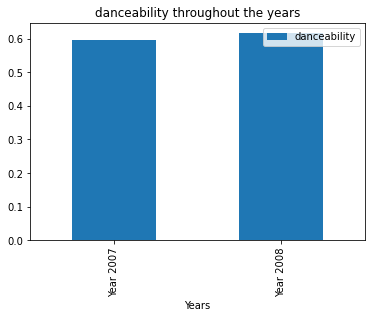

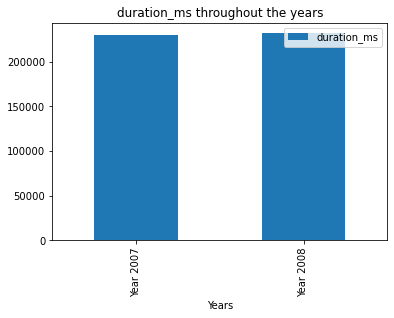

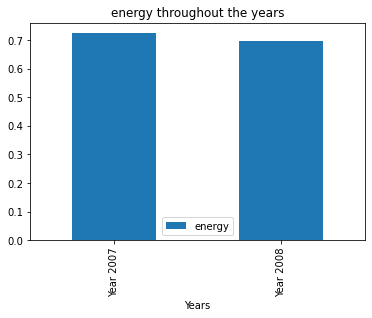

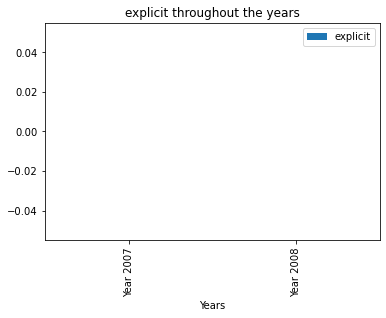

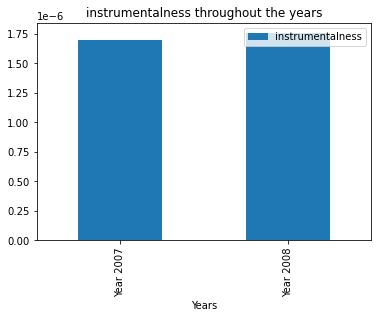

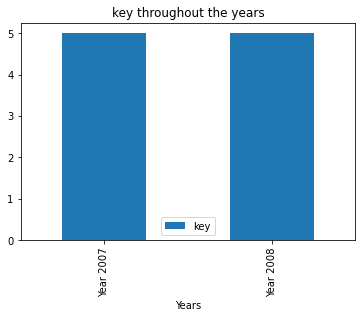

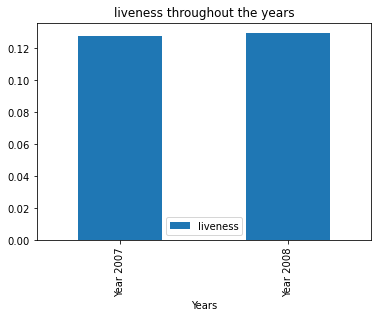

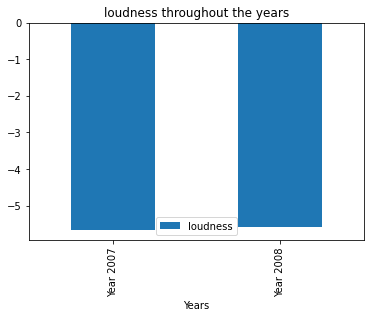

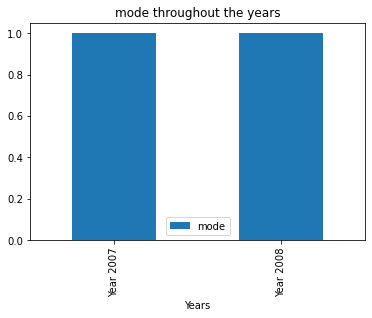

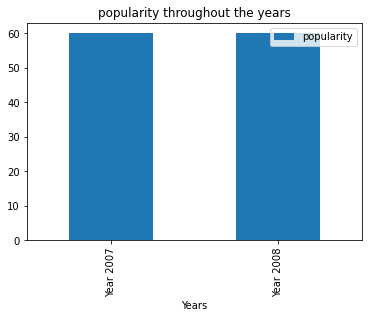

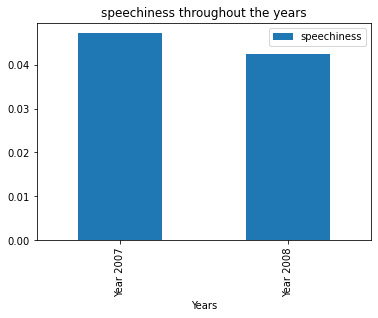

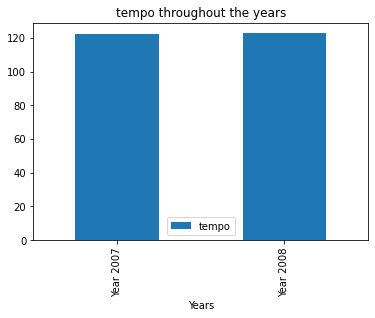

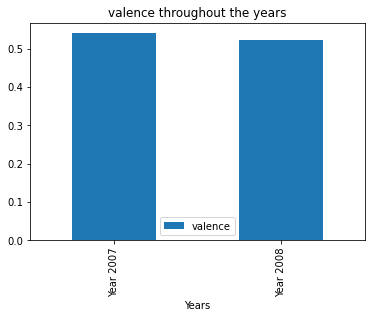

In [80]:
#Creating for loop to plot
for i in ec2_column_list:
    ec2_transposed_combined_df.plot(kind = 'bar', x = 'index', y = i)
    plt.title(f'{i} throughout the years')
    plt.xlabel('Years')
    plt.show();

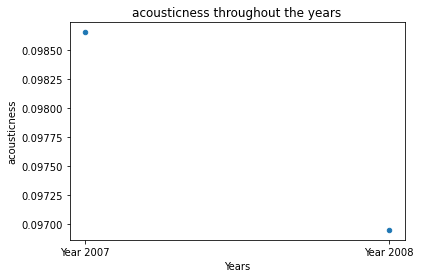

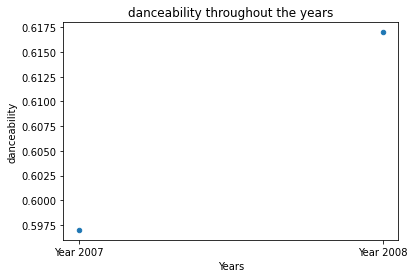

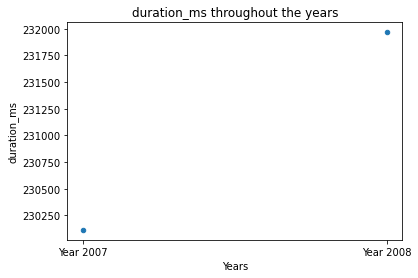

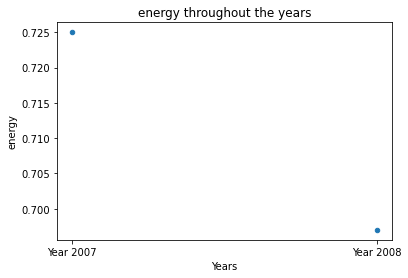

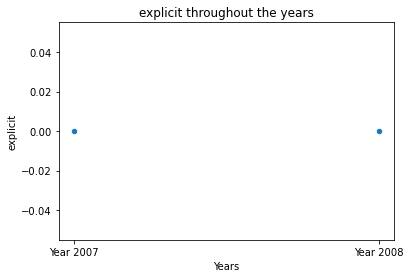

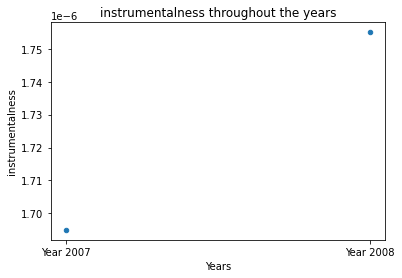

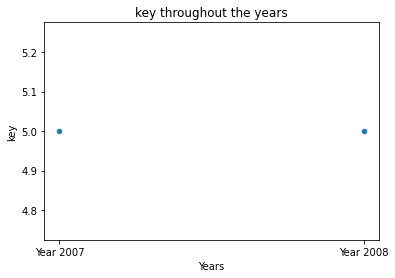

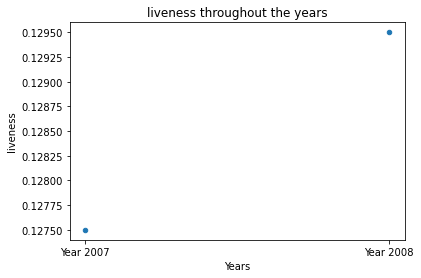

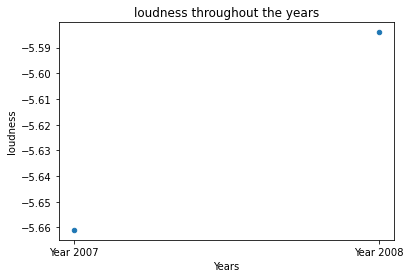

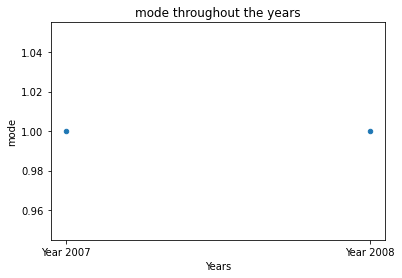

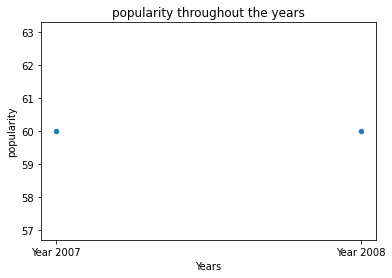

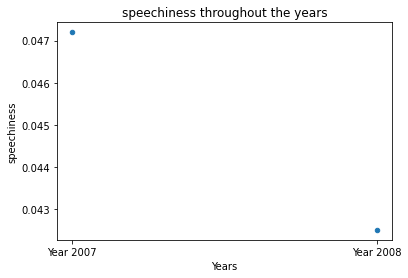

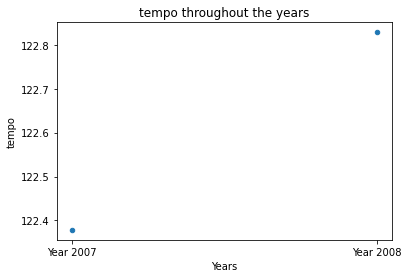

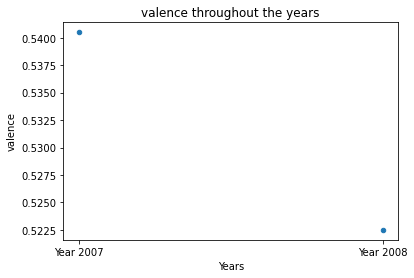

In [81]:
for i in ec2_column_list:
    ec2_transposed_combined_df.plot(kind = 'scatter', x = 'index', y = i)
    plt.title(f'{i} throughout the years')
    plt.xlabel('Years')
    plt.show();

In [82]:
#Gathering data from all major 5 events in a df
five_events_df = pd.concat([gd_transposed_combined_df, ww2_transposed_combined_df,ec_transposed_combined_df,ta_transposed_combined_df,ec2_transposed_combined_df, year_2020_df ], axis = 0, sort=False)
five_events_df.reset_index().drop(columns='level_0').sort_index('index')
five_events_df


,index,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
0,Year 1929,0.95200,0.6830,161000.0,0.2365,0.0,0.000009,6.0,0.1785,-17.5710,1.0,0.0,0.19800,115.3465,0.6460
1,Year 1930,0.98400,0.5340,184220.0,0.2800,0.0,0.064500,5.0,0.1420,-12.8735,1.0,1.0,0.05405,108.3155,0.5975
2,Year 1931,0.93550,0.6565,158716.5,0.2200,0.0,0.000133,5.0,0.1805,-16.8360,1.0,0.0,0.12850,110.5565,0.4890
3,Year 1932,0.94150,0.6230,170992.5,0.2330,0.0,0.000228,5.0,0.1675,-16.0120,1.0,0.0,0.08380,107.8550,0.6105
4,Year 1933,0.95300,0.6065,178420.0,0.2405,0.0,0.000309,5.0,0.1560,-12.4010,1.0,9.0,0.04865,108.5635,0.6135
5,Year 1934,0.97200,0.5375,184146.5,0.2225,0.0,0.029700,5.0,0.1430,-14.8240,1.0,0.0,0.05430,116.9315,0.5690
6,Year 1935,0.94050,0.6010,182421.0,0.2235,0.0,0.010950,6.0,0.1640,-13.6070,1.0,1.0,0.05350,110.9435,0.5535
7,Year 1936,0.85150,0.6490,186026.5,0.3390,0.0,0.000063,5.0,0.1720,-13.2290,1.0,10.0,0.07110,107.4875,0.6600
8,Year 1937,0.95000,0.5845,180994.5,0.2635,0.0,0.058500,6.0,0.1600,-12.5690,1.0,0.0,0.05335,112.5110,0.6250
9,Year 1938,0.97300,0.4870,193233.5,0.2360,0.0,0.312000,5.0,0.1690,-14.6005,1.0,0.0,0.04795,110.6530,0.5160


In [83]:
#modifying df 
five_events_df.columns = [x.title() for x in five_events_df.columns]
five_events_df.rename(columns={'Index':'Years'}, inplace=True)
five_events_df

,Years,Acousticness,Danceability,Duration_Ms,Energy,Explicit,Instrumentalness,Key,Liveness,Loudness,Mode,Popularity,Speechiness,Tempo,Valence
0,Year 1929,0.95200,0.6830,161000.0,0.2365,0.0,0.000009,6.0,0.1785,-17.5710,1.0,0.0,0.19800,115.3465,0.6460
1,Year 1930,0.98400,0.5340,184220.0,0.2800,0.0,0.064500,5.0,0.1420,-12.8735,1.0,1.0,0.05405,108.3155,0.5975
2,Year 1931,0.93550,0.6565,158716.5,0.2200,0.0,0.000133,5.0,0.1805,-16.8360,1.0,0.0,0.12850,110.5565,0.4890
3,Year 1932,0.94150,0.6230,170992.5,0.2330,0.0,0.000228,5.0,0.1675,-16.0120,1.0,0.0,0.08380,107.8550,0.6105
4,Year 1933,0.95300,0.6065,178420.0,0.2405,0.0,0.000309,5.0,0.1560,-12.4010,1.0,9.0,0.04865,108.5635,0.6135
5,Year 1934,0.97200,0.5375,184146.5,0.2225,0.0,0.029700,5.0,0.1430,-14.8240,1.0,0.0,0.05430,116.9315,0.5690
6,Year 1935,0.94050,0.6010,182421.0,0.2235,0.0,0.010950,6.0,0.1640,-13.6070,1.0,1.0,0.05350,110.9435,0.5535
7,Year 1936,0.85150,0.6490,186026.5,0.3390,0.0,0.000063,5.0,0.1720,-13.2290,1.0,10.0,0.07110,107.4875,0.6600
8,Year 1937,0.95000,0.5845,180994.5,0.2635,0.0,0.058500,6.0,0.1600,-12.5690,1.0,0.0,0.05335,112.5110,0.6250
9,Year 1938,0.97300,0.4870,193233.5,0.2360,0.0,0.312000,5.0,0.1690,-14.6005,1.0,0.0,0.04795,110.6530,0.5160


In [84]:
#coloumn list
five_column_list = five_events_df.columns[1:]
five_column_list

Index(['Acousticness', 'Danceability', 'Duration_Ms', 'Energy', 'Explicit',
       'Instrumentalness', 'Key', 'Liveness', 'Loudness', 'Mode', 'Popularity',
       'Speechiness', 'Tempo', 'Valence'],
      dtype='object')

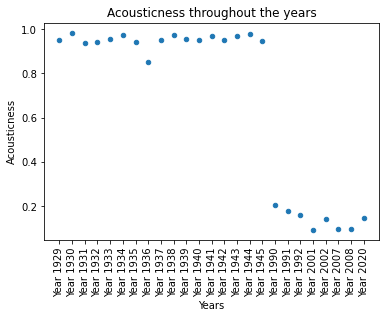

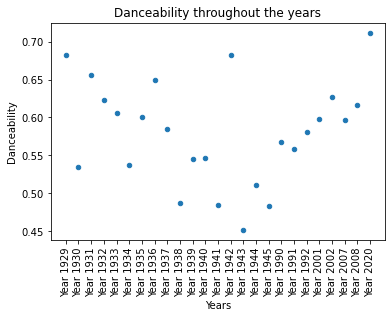

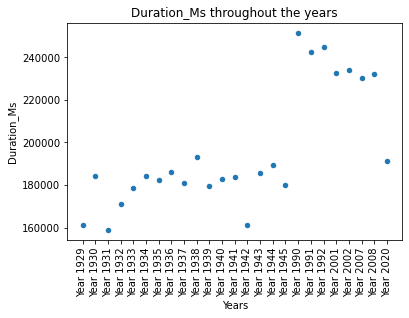

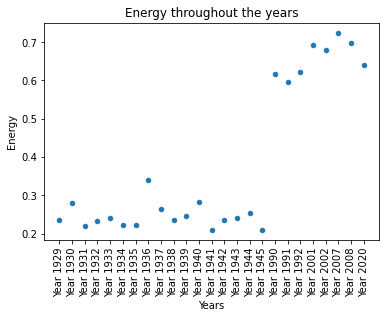

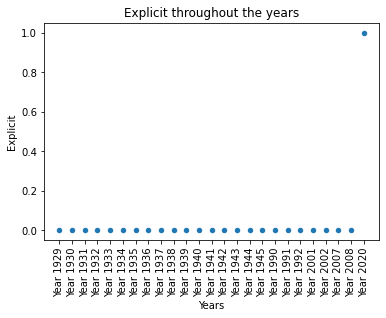

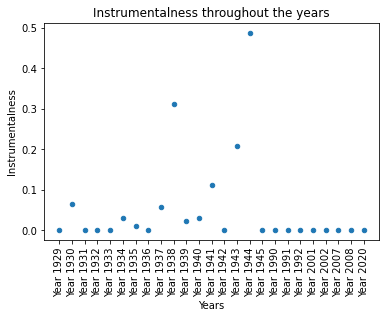

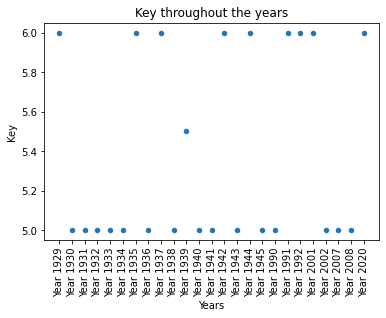

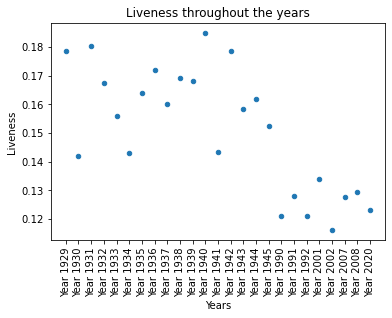

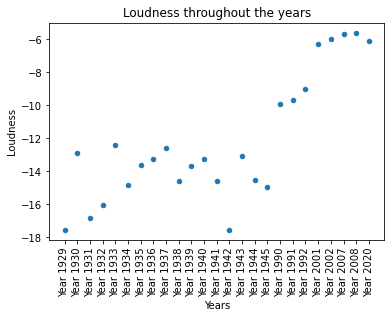

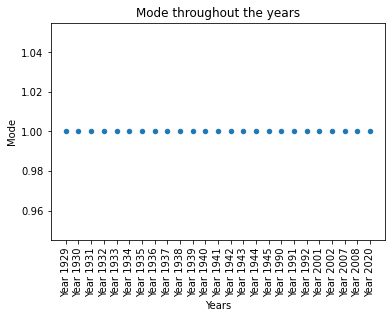

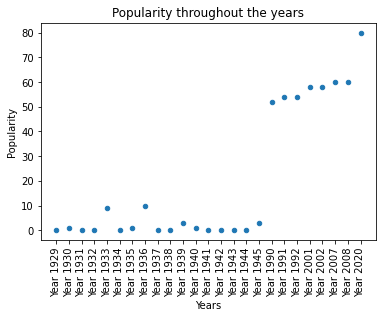

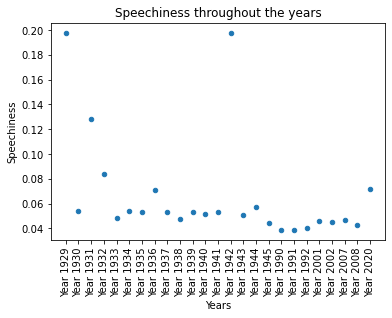

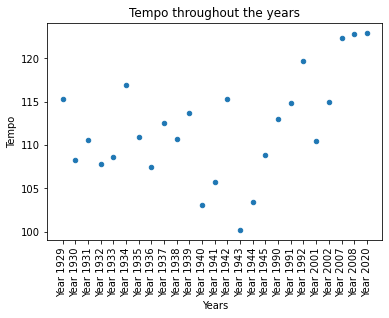

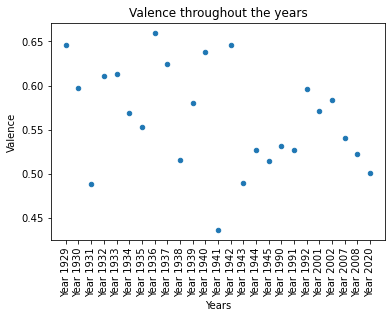

In [85]:
#Plot 5 events df
for i in five_column_list:
    five_events_df.plot(kind = 'scatter', x = 'Years', y = i)
    plt.title(f'{i} throughout the years')
    plt.xlabel('Years')
    plt.xticks(rotation=90)
    plt.show();